<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week_3_4_Freq_Domain_Spectral_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)

In [ ]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA") ## TSAAR's package for data and functions
install.packages("fpp2") ## FPP2's package for data and functions
install.packages("tidyverse") ## for better data management

library(TSA)
library(fpp2)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Spectral Analysis

* also known as *frequency domain analysis*. (TSAAR)
* A field of time series analysis which involves methodologies to extract insights on the regular periodic behavior of the time series data.

Comment:
* Analyzing time series data through the autocorrelations is what we would call analyzing time series data on the *time domain*
* Analyzing the preiodic/frequency/wave patterns in time series data is what we would call analyzing the time series data on the *frequency domain*.
* We typically do spectral analysis for stationary data. Often, the data is differenced or detrended before analysis is conducted.


## Wave Equation / Periodic Process (TSAAR, TSDAAUR)

Let's begin with the basic wave equation, such that for time $t \in \mathbb{R}$,

$$x_t = R \cos (2\pi  f  t +\Phi)$$

$R=$ the *amplitude* of the wave, i.e., the height of the function from the x-axis

$f=$ the *frequency* of the time series, meaning how many times a pattern is observed in 1 unit of time. $\frac{1}{f}$ is often described as the *period* of the time series, in which the curve would repeat every $\frac{1}{f}$ time units.

$\Phi =$ is the *phase* or *shift* in the wave, which just determines the starting point of the wave.

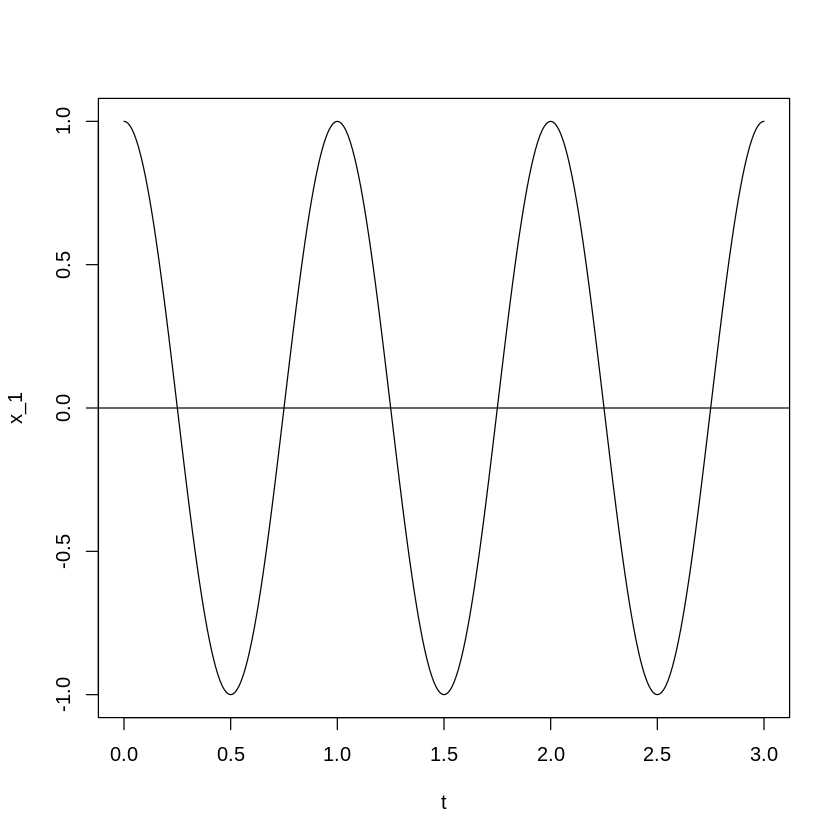

In [ ]:
## Basic Parts of the Wave Equation

## setup the t vector

t <- seq(from = 0, to = 3 , by = 0.01 )

## Base parameter setup

R1 <- 1
f1 <- 1
Phi1 <- 0

x_1 <- R1 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
abline(h = 0)

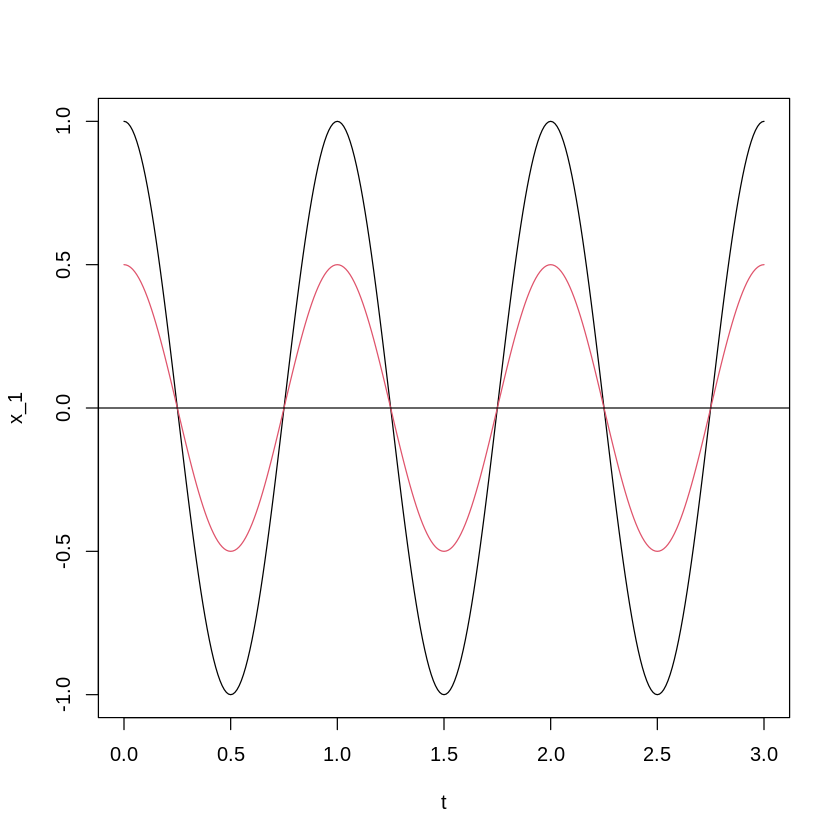

In [ ]:
## Changing Amplitude

R2 <- 0.5
f1 <- 1
Phi1 <- 0

x_2 <- R2 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

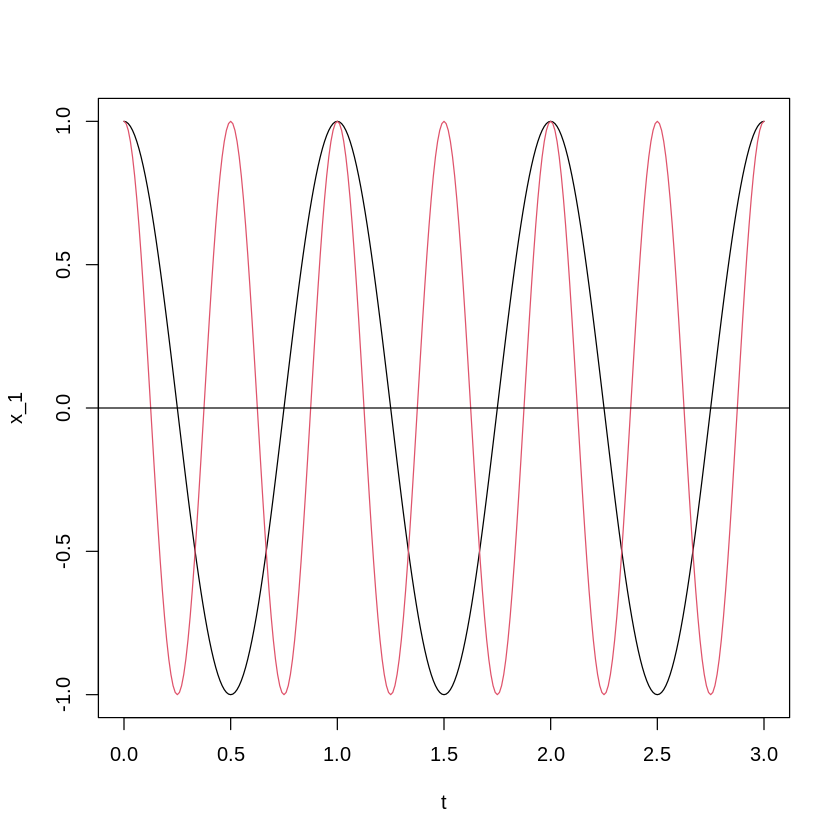

In [ ]:
## Changing Frequency

R1 <- 1
f2 <- 2
Phi1 <- 0

x_2 <- R1 * cos(2*pi*f2 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

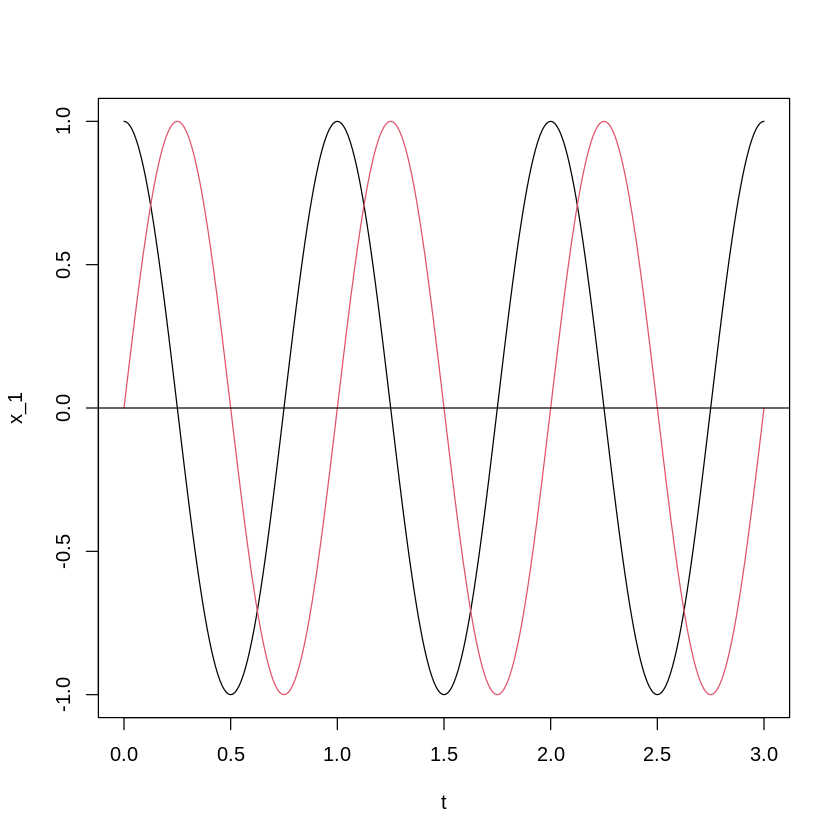

In [ ]:
## Changing Phase

R1 <- 1
f1 <- 1
Phi2 <- -pi/2

x_2 <- R1 * cos(2*pi*f1 *t + Phi2 )

## this shift is equivalent to the sine function with similar amplitude and frequency due to sine and cosine being complementary (thus "co-"sine)

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

Note that the wave function above only works out for only one wave of which data often involves a sum of multiple waves at differing amplitudes, frequencies, and shifts, in addition to some randomness like a white noise process.

Using the example in TATSAIR (pp.151-152), let us plot the following waves that add up together to form a simulated data that is not that far off from what is seen from real data:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right)$$

$$X_{2t} = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right)$$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$



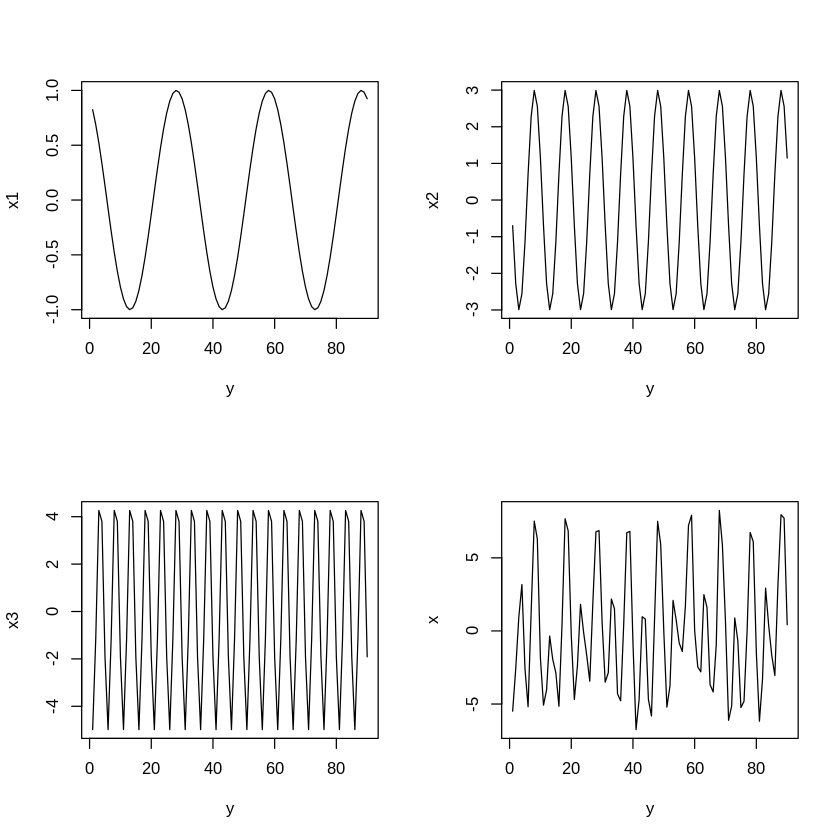

In [ ]:
## Set Up Input
y<-seq(from = 1, to = 90, by = 1)

## Wave Components
x1<- 1*cos(2*pi*y*1/30 + pi/8)
x2<- 3*cos(2*pi*y*1/10 + 3*pi/8)
x3<- 5*cos(2*pi*y*1/5 + 5*pi/8)

## Set Seed for Normal White Noise
set.seed(1)
z<- rnorm(length(y), 0, 1)

## Summing UP Components
x<-x1+x2+x3+z

## Displaying Plots in a 2x2 setup
par(mfrow=c(2,2))

## Individual Wave Components and Simulated Data
plot(y, x1, type="l", xlab="y", ylab="x1")
plot(y, x2, type="l", xlab="y", ylab="x2")
plot(y, x3, type="l", xlab="y", ylab="x3")
plot(y, x, type="l", xlab="y", ylab="x")

Alternatively, we can express the same equation with the following equation (TSAAR):

$$x_t = R cos (2\pi  f  t +\Phi) = A \cos(2\pi ft) + B \sin(2\pi ft)$$

Where the two equations one-to-one transformations with

$$ R = \sqrt{A^2 + B^2} \quad , \quad \Phi = arctan (-B/A) $$

$$ A = R \cos(\Phi) \quad , \quad B = R \sin(\Phi) $$

With $arctan()$ being the arc tangent function defined with $\mathbb{R}$ as domain and itss range is $(-\pi/2, \pi/2)$.

In terms of statistical modeling, if we have data $y_t$ that we would like to fit a wave function with frequency $f$ as a known quantity before modeling, we can use $x_{1t} = \cos(2\pi ft)$ and $x_{2t} = \sin(2\pi ft)$ as independent variables with parameters $A$ and $B$ to be estimated by a model.

## The Harmonic Regression Model

By the re-expression of the wave function into a pair of sin and cos functions for a given frequency, we can fit these function pairs with different frequencies into periodic time series data with a model of the following form (TSAAR):

$$Y_t = A_0 + \sum_{j=1}^m \left[ A_j \cos(2\pi f_j t) + B_j \sin(2\pi f_j t) \right] + Z_t$$
$$Z_t \sim iid. N(0,\sigma^2)$$

Where $f_j$ are a frequencies of interest for the researcher.

If $f_j$ is a family of frequencies allowed for the data, called *Fourier frequencies*, the regression model becomes easier. For a number of data points $n$ with $k = [[n/2]]$, where $[[r]]$ truncates the decimal or fractional value of $r>0$, the Fourier frequencies are $f_j = 1/n, 2/n, ..., k/n$. The sine and cosine regressor variables are orthogonal and thus the coefficients are simpler to estimate.

In the odd $n = 2k +1$ case, the summation above is

$$Y_t = A_0 + \sum_{j=1}^k \left[ A_j \cos \left(2\pi \frac{j}{n} t \right) + B_j \sin \left(2\pi \frac{j}{n} t \right) \right] + Z_t$$

And the solutions to the parameters $A_j$ and $B_j$ are:

$$\hat{A}_0 = \bar{Y}$$

$$\hat{A}_j = \frac{2}{n} \sum_{t=1}^n Y_t \cos \left(2\pi \frac{j}{n} t \right) $$

$$\hat{B}_j = \frac{2}{n} \sum_{t=1}^n Y_t \sin \left(2\pi \frac{j}{n} t \right) $$

In the case of even $n = 2k$, the solution for $j = 1, 2,..., k-1$ is similar to the estimators above except for

$$\hat{A}_k = \frac{1}{n} \sum_{t=1}^n (-1)^{t} Y_t $$
$$\hat{B}_k = 0$$

Note that $f_k = 1/2$ when $n$ is even.

The estimation procedure above works whether there is a deterministic or stochastic model for the construction of the periodic function or periodic time series.

Using the example in TATSAIR, we can re-express the components into this form:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right) = \left[  \cos \left( \frac{\pi}{8} \right) \right] \cos \left( 2\pi \times \frac{1}{30} \times t \right) + \left[  \sin \left( \frac{\pi}{8} \right) \right] \sin \left( 2\pi \times \frac{1}{30} \times t \right) $$

$$X_{2t}  = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right) = \left[  3 \cos \left( \frac{3 \pi}{8}\right) \right] \cos \left( 2\pi \times \frac{1}{10} \times t \right) + \left[  3 \sin \left( \frac{3 \pi}{8}\right) \right] \sin \left( 2\pi \times \frac{1}{10} \times t \right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right) = \left[  5 \cos \left( \frac{5 \pi}{8}\right) \right] \cos \left( 2\pi \times \frac{1}{5} \times t \right) + \left[  5 \sin \left( \frac{5 \pi}{8}\right) \right] \sin \left( 2\pi \times \frac{1}{5} \times t \right) $$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$


If we would assume that $n = 90$ and ignore the stochastic term $Z_t$, i.e., just deal with $X_t^{(deterministic)} =  X_{1t} + X_{2t} + X_{3t}$, the values for $\hat{A}_j$ and $\hat{B}_j$ are:

for $f_3 = 3/90 = 1/30$: $\hat{A}_3 = \cos \left( \frac{\pi}{8} \right)$ and $\hat{B}_3 = \sin \left( \frac{\pi}{8} \right)$

for $f_9 = 9/90 = 1/10$: $\hat{A}_9 = 3 \cos \left( \frac{3 \pi}{8} \right)$ and $\hat{B}_9 = 3 \sin \left( \frac{3 \pi}{8} \right)$

for $f_{18} = 18/90 = 1/5$: $\hat{A}_{18} = 5 \cos \left( \frac{5 \pi}{8} \right)$ and $\hat{B}_{18} = 5 \sin \left( \frac{5 \pi}{8} \right)$

For other $f_j$, $\hat{A}_j = \hat{B}_j = 0$.

If ever we include the white noise $Z_t$, there will be some slight difference but not too drastic.

## The Periodogram

* for an odd sample size $n= 2k+1$, the periodogram $I$ at frequency $f=j/n$, for $j=1,2,...,k$ is defined as:

$$I \left( \frac{j}{n} \right) =\frac{n}{2} \left( \hat{A}_j^2 + \hat{B}_j^2  \right) $$

* for an even sample size $n = 2k$, the periodogram is similar for $j =1,2,...,k -1 $ as shown above except for

$$I \left( \frac{1}{2}\right) = n \hat{A}_k^2 $$

* the periodogram shows the relative strength of the sine-cosine pair at various frequencies.

* For odd $n$, the sum below has 2 degrees of freedom; for even $n$ it has 1 degree of freedom:

$$ (n-1) S_Y^2 = \sum_{t=1}^n \left( Y_t - \bar{Y}\right)^2 = \sum_{j=1}^k I \left( \frac{j}{n} \right) $$

* The periodogram breaks down which frequency contributes to the periodic behavior of the time series.

Let's demonstrate with a a code using the example from TATSAIR:

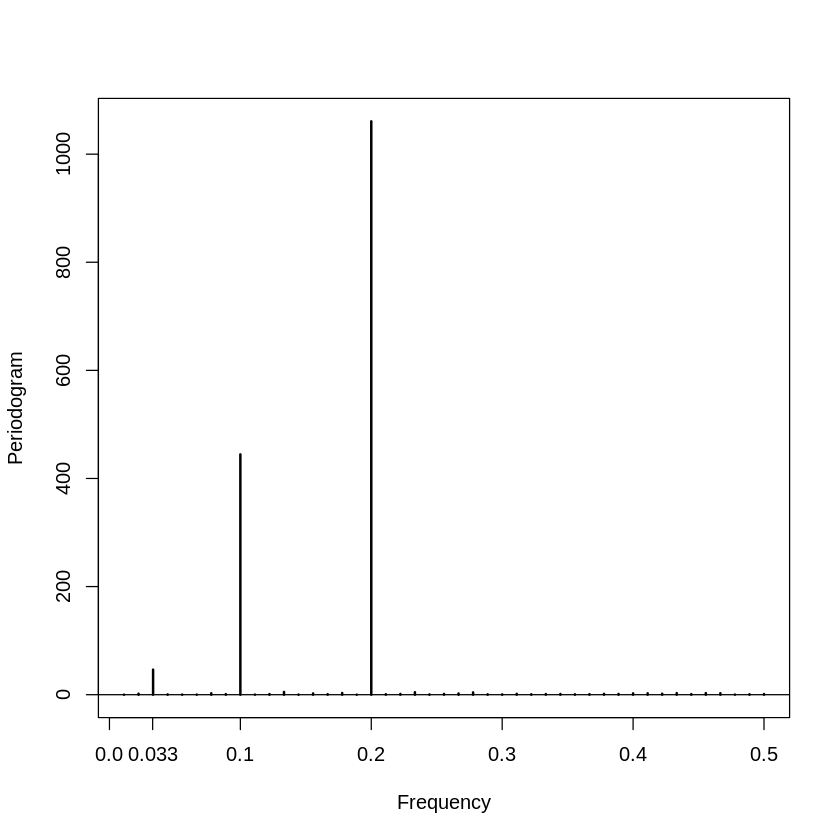

In [ ]:
## Using the output from the TATSAIR Example

## generate the periodogram
periodogram(x)

## add a x-axis line
abline(h = 0)

## add an axis labels for 1/30
axis(1, at = 0.033)

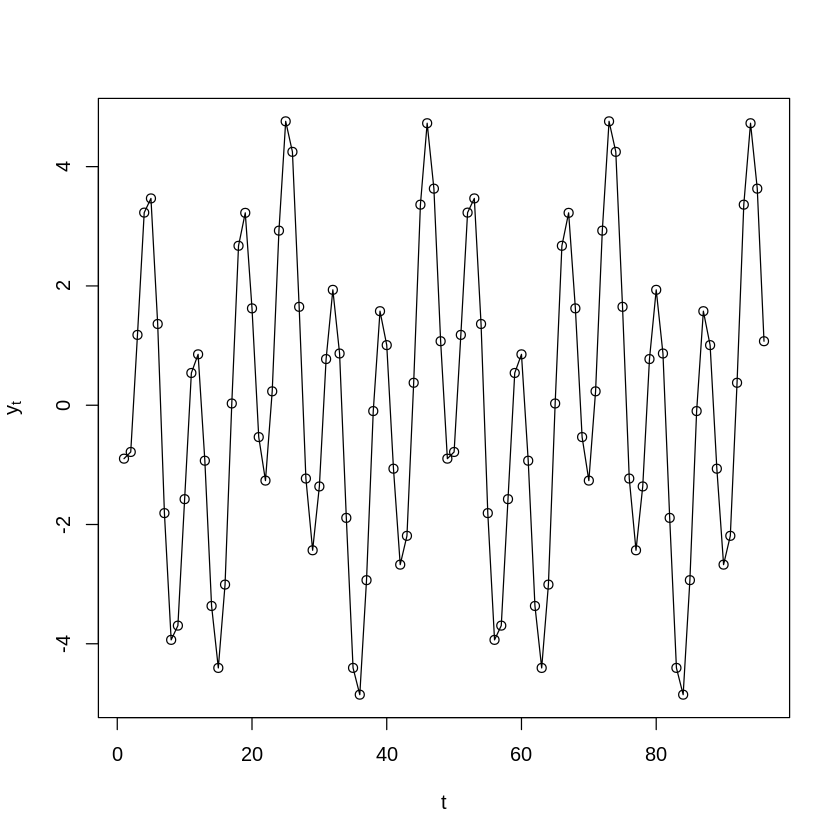

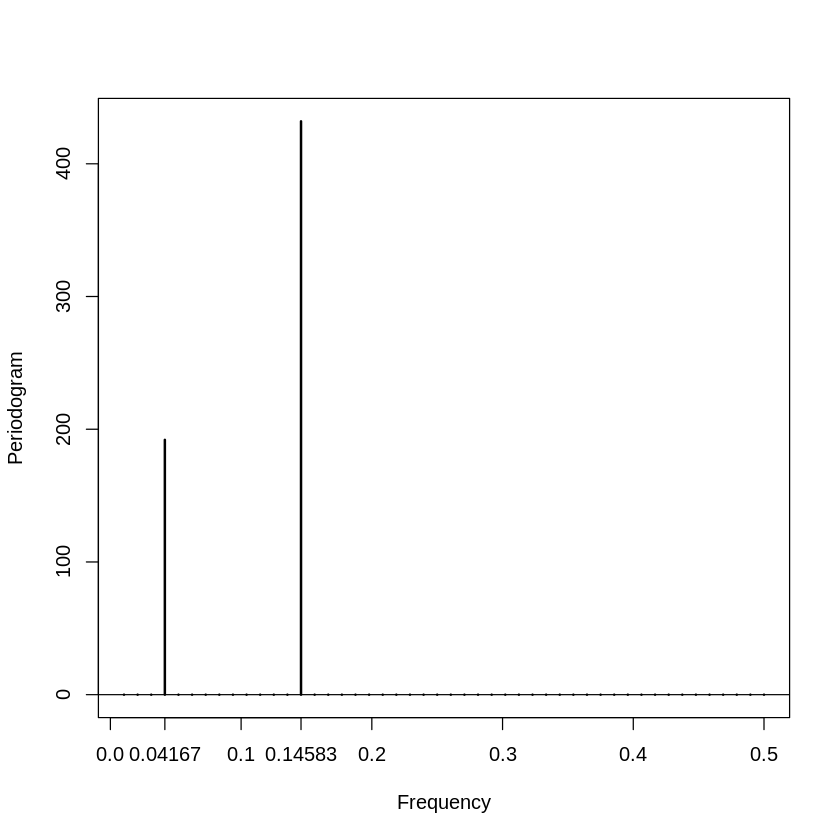

In [ ]:
## Using a second example from TSAAR

t <- 1:96 ## time indices
cos1 <- cos(2*pi*t*4/96) ## 4/96 = 1/24
cos2 <- cos(2*pi*(t*14/96+.3)) ## = cos(2*\pi*0.3) cos(2*pi*(t*14/96)) + sin(2*\pi*0.3) sin(2*pi*(t*14/96)) ;
## f = 14/96 = 7/48

## full series
y=2*cos1+3*cos2
## y = 2 cos(2*pi*t*4/96) + 3 cos(2*\pi*0.3) cos(2*pi*(t*14/96)) + 3 sin(2*\pi*0.3) sin(2*pi*(t*14/96))
plot(t,y,type='o',ylab=expression(y[t]))

## generate the periodogram
periodogram(y)

## add a x-axis line
abline(h = 0)

## add axis labels
axis(1,at=c(0.04167,.14583))

List of 16
 $ freq     : num [1:48] 0.0104 0.0208 0.0312 0.0417 0.0521 ...
 $ spec     : num [1:48] 8.78e-29 7.51e-29 5.35e-29 1.92e+02 2.18e-28 ...
 $ coh      : NULL
 $ phase    : NULL
 $ kernel   : NULL
 $ df       : num 2
 $ bandwidth: num 0.00301
 $ n.used   : int 96
 $ orig.n   : int 96
 $ series   : chr "x"
 $ snames   : NULL
 $ method   : chr "Raw Periodogram"
 $ taper    : num 0
 $ pad      : num 0
 $ detrend  : logi FALSE
 $ demean   : logi TRUE
 - attr(*, "class")= chr "spec"


[1] 0.01041667 0.02083333 0.03125000 0.04166667 0.05208333 0.06250000
 [7] 0.07291667 0.08333333 0.09375000 0.10416667 0.11458333 0.12500000
[13] 0.13541667 0.14583333 0.15625000 0.16666667 0.17708333 0.18750000
[19] 0.19791667 0.20833333 0.21875000 0.22916667 0.23958333 0.25000000
[25] 0.26041667 0.27083333 0.28125000 0.29166667 0.30208333 0.31250000
[31] 0.32291667 0.33333333 0.34375000 0.35416667 0.36458333 0.37500000
[37] 0.38541667 0.39583333 0.40625000 0.41666667 0.42708333 0.43750000
[43] 0.44791667 0.45833333 0.46875000 0.47916667 0.48958333 0.50000000

[1] 8.783450e-29 7.509381e-29 5.345534e-29 1.920000e+02 2.177778e-28
 [6] 5.619360e-28 1.903221e-28 4.095288e-29 9.497746e-29 3.536726e-29
[11] 1.279343e-28 1.405279e-28 6.719125e-28 4.320000e+02 5.873772e-28
[16] 7.068112e-29 1.003380e-28 1.491804e-28 3.650833e-28 9.597808e-30
[21] 1.723564e-28 5.803727e-31 2.685440e-28 8.646244e-29 1.315117e-28
[26] 7.372973e-29 7.364500e-29 6.943619e-29 1.803620e-30 1.973179e-28
[31] 7.658877e-29 1.766720e-31 3.965909e-30 2.061556e-28 3.758522e-28
[36] 9.565887e-29 1.247835e-28 1.349610e-28 5.716152e-29 5.956936e-29
[41] 1.095383e-28 1.284210e-28 5.648860e-29 5.259073e-29 1.688687e-28
[46] 3.305416e-28 7.022202e-28 2.221958e-29

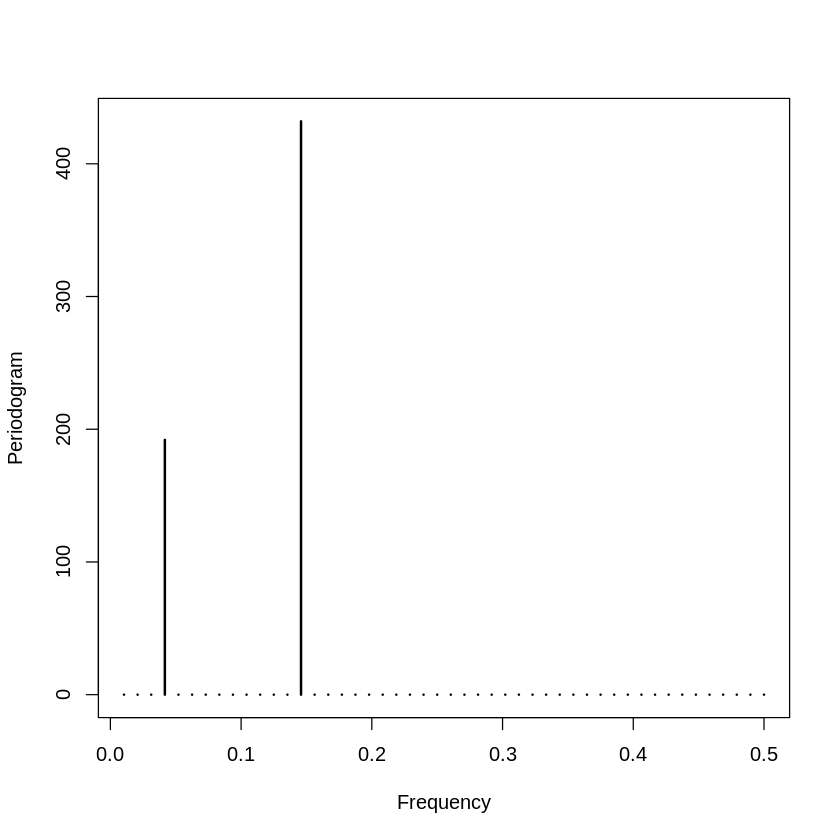

In [ ]:
## How to Extract the periodogram values

## Look at the objects inside the periodogram
str(periodogram(y))

## Frequency
periodogram(y)$freq

## Spectral Value
periodogram(y)$spec

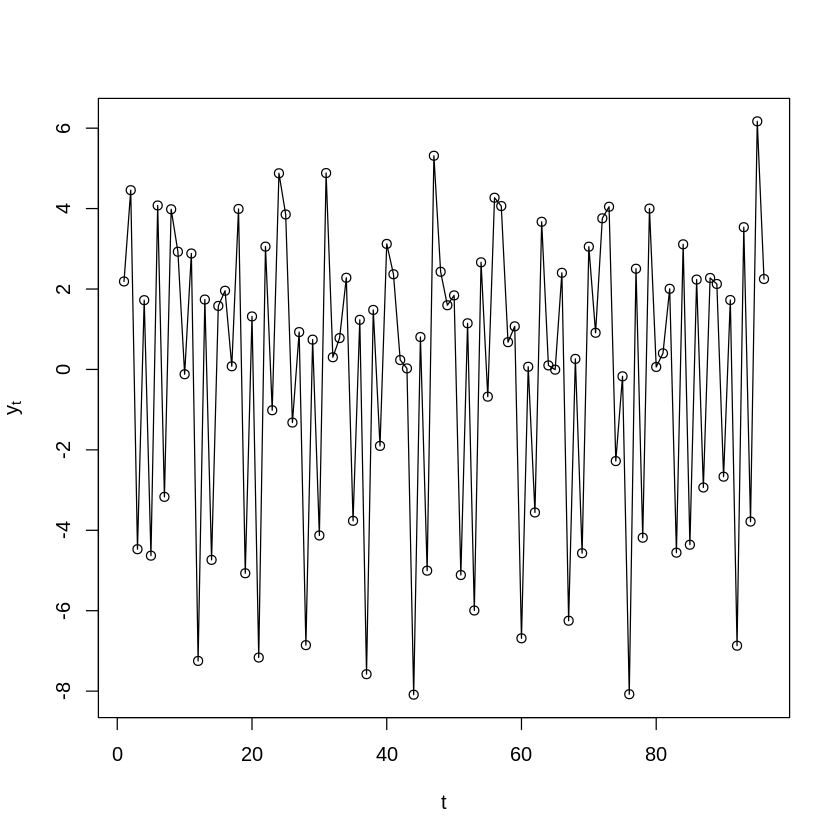

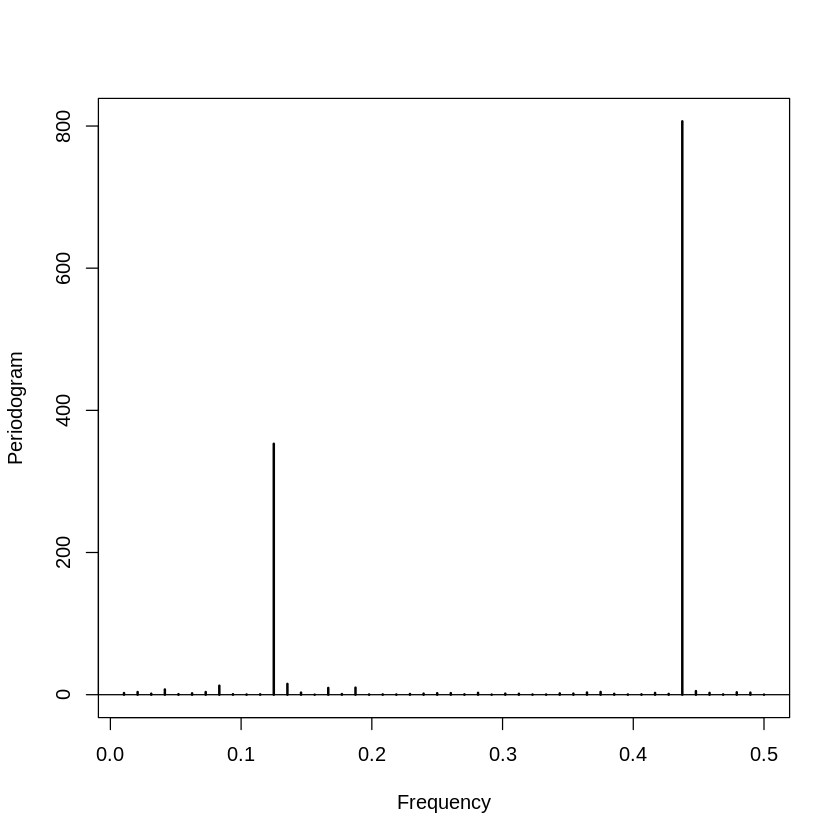

,freq,spec
,<dbl>,<dbl>
12,0.1250,352.9672
42,0.4375,806.5975


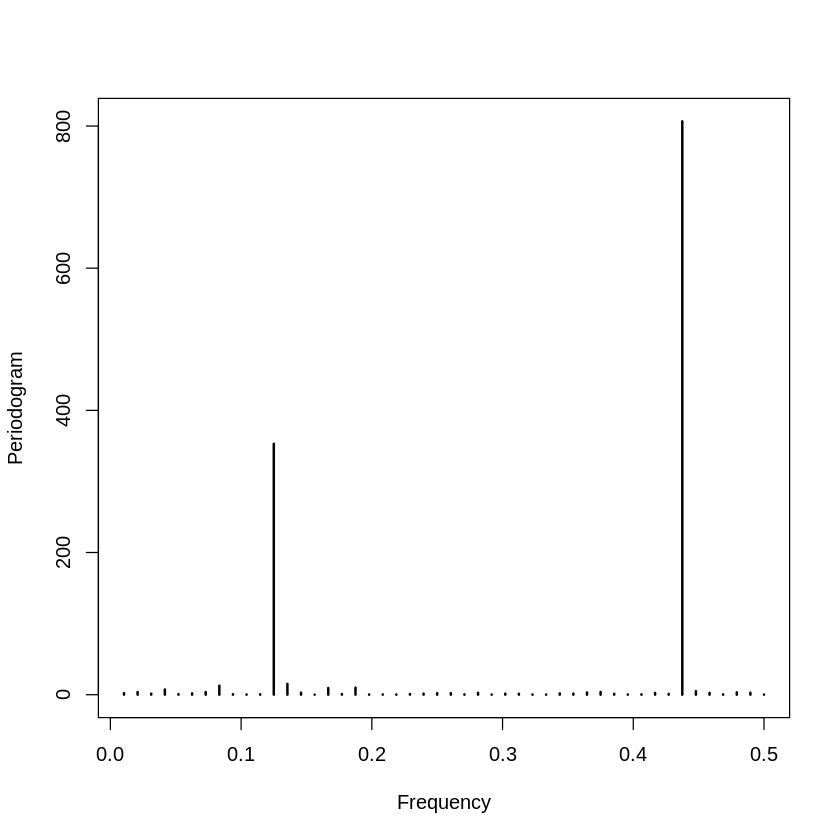

In [ ]:
## Periodogram of Data with Hidden Periodicities

## Time Index
t <- 1:96

## Setting seed for random sample
set.seed(134)

## randomized frequency selected
integer <- sample(48,2)
freq1 <- integer[1]/96
freq2 <- integer[2]/96

## Randomly selecting coefficients
A1 <- rnorm(1,0,2)
B1 <- rnorm(1,0,2)
A2 <- rnorm(1,0,3)
B2 <- rnorm(1,0,3)

## Angle*time
w <- 2*pi*t

## Y Series generated
y <- A1*cos(w*freq1)+B1*sin(w*freq1)+A2*cos(w*freq2)+ B2*sin(w*freq2)+rnorm(96,0,1)

## Plot the data
plot(t,y,type='o',ylab=expression(y[t]))

## Periodogram

periodogram(y)
abline(h=0)

## Data Frame

dat1 <- data.frame(freq = periodogram(y)$freq, spec = periodogram(y)$spec)

dat1[which(dat1$spec > 200),]

From the periodogram, the two spikes seem to have been at $f = 1/8$ with $I(1/8) = 352.97 $ and $f= 7/16$ with $I(7/16) = 806.60 $. The different non-zero periodogram values were by nature of the randomness of the $A$ and $B$ terms.

Let's use a real data from TSAAR, the data on Variable Star Brightness on 600 Consecutive Nights.

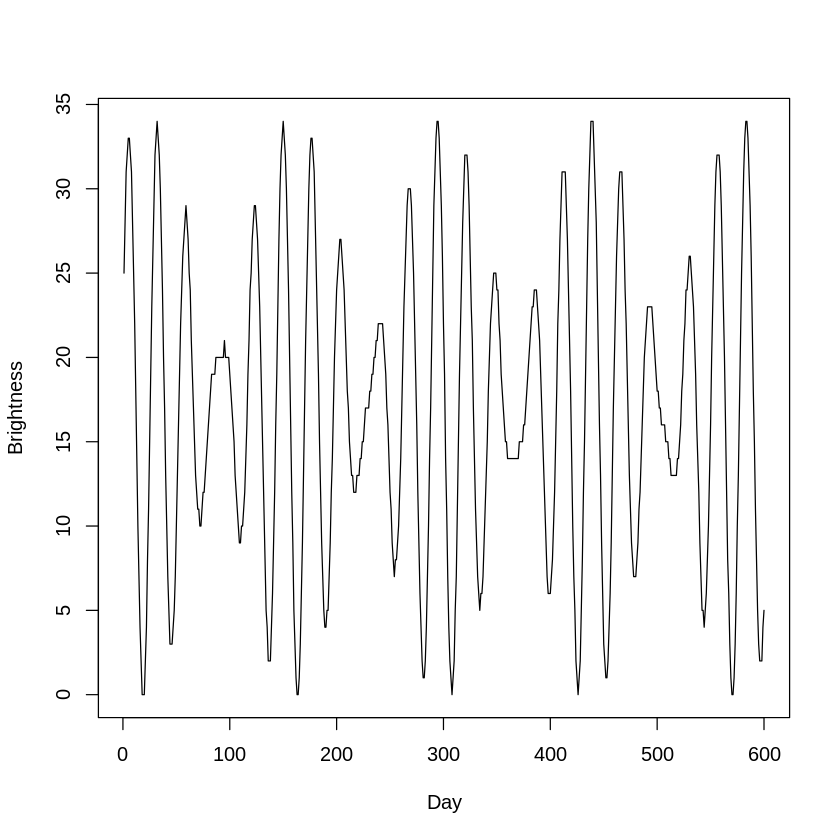

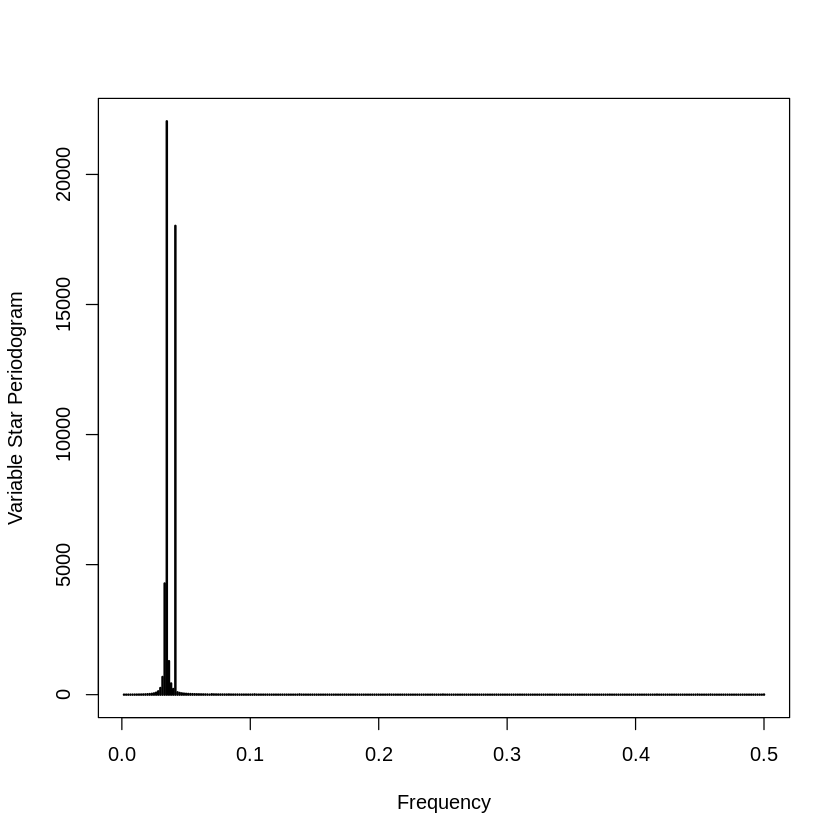

,freq,spec
,<dbl>,<dbl>
21,0.03500000,22041.6
25,0.04166667,18022.0


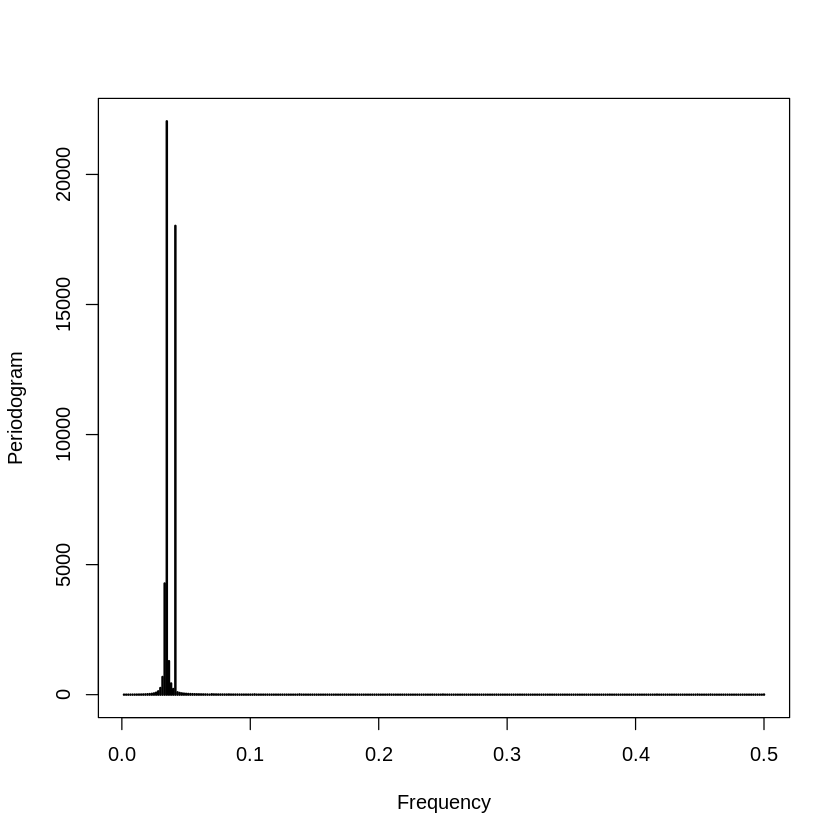

In [ ]:
## Variable Star Brightness on 600 Consecutive Nights Example

## Attach data
data(star)

## Plot data
plot(star,xlab='Day',ylab='Brightness')

## Plot Periodogram
periodogram(star,ylab='Variable Star Periodogram')

## Extract Periodogram Values
periodogram_data <- data.frame(freq = periodogram(star)$freq, spec = periodogram(star)$spec)

## Which frequencies had large peaks
periodogram_data[which(periodogram_data$spec > 15000), ]

## Peaks were at f = 0.035 & f = 0.04166...
## equivalent to 1/f = 1/0.035 = 28.57 or about 29 days, which TSAAR used
## and 1/f = 1/0.04166... = 24 days

In [ ]:
## Running a Harmonic Regression Model with the given frequencies

## Sample Size
n <- length(star)

## Time Index
t <- 1:n

## Frequencies
f1 <- 1/29
f2 <- 1/24

## Sin Cos Pairs
sin1 <- sin( 2*pi* f1 * t)
cos1 <- cos( 2*pi* f1 * t)
sin2 <- sin( 2*pi* f2 * t)
cos2 <- cos( 2*pi* f2 * t)

## Regression Estimation

hm1 <- lm(star ~ sin1+cos1+sin2+cos2)

summary(hm1)

## There is a very high R-Squared of 99.9%, Indicating an almost perfect fit.


Call:
lm(formula = star ~ sin1 + cos1 + sin2 + cos2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60716 -0.23237 -0.01491  0.20676  0.82649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.08580    0.01238  1380.4   <2e-16 ***
sin1         7.98648    0.01755   455.2   <2e-16 ***
cos1         6.06876    0.01753   346.2   <2e-16 ***
sin2         6.84309    0.01754   390.1   <2e-16 ***
cos2        -1.83495    0.01753  -104.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3031 on 595 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9989 
F-statistic: 1.313e+05 on 4 and 595 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 194.1, df = 10, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  residuals(hm1)
W = 0.98737, p-value = 4.725e-05


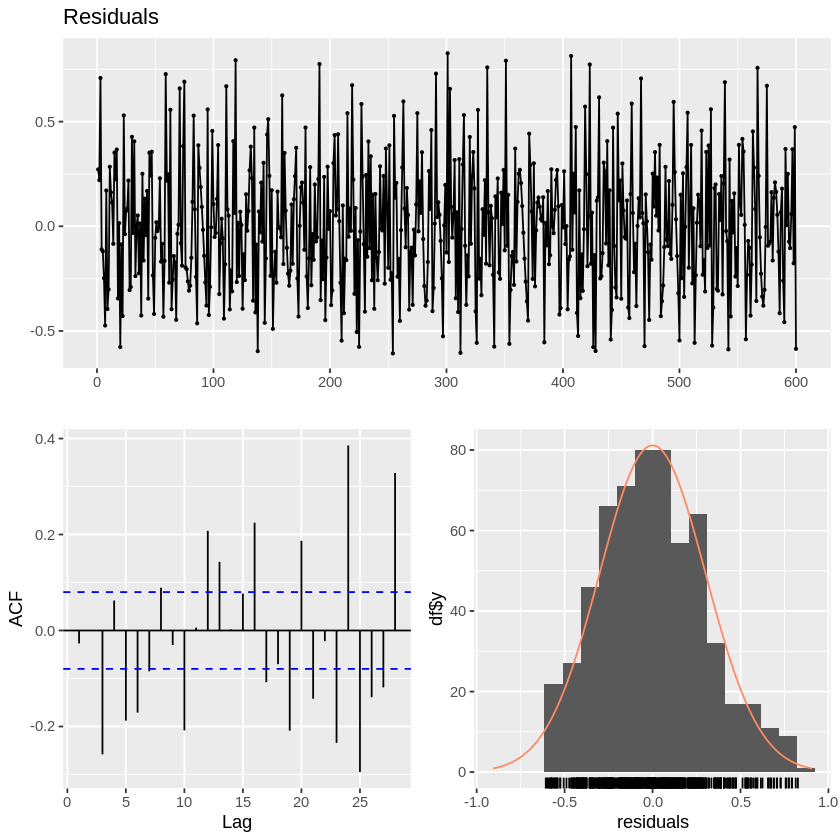

In [ ]:
## Residual Diagnostics

checkresiduals(hm1)
shapiro.test(residuals(hm1))

## There are still some problems with the regression in terms of autocorrelation and normality.
## With normality, we can use robust approaches, but autocorrelation may be indicative of
## other frequencies still being relevant or other time series features being more useful.

We can extend the definition of the period beyond Fourier frequencies to any frequency $0 \le f \le 1/2$:

$$I \left( f \right) =\frac{n}{2} \left( \hat{A}_f^2 + \hat{B}_f^2  \right) $$

where

$$\hat{A}_f = \frac{2}{n} \sum_{t=1}^n Y_t \cos \left(2\pi f t \right) \quad , \quad \hat{B}_f = \frac{2}{n} \sum_{t=1}^n Y_t \sin \left(2\pi f t \right) $$

In this method, the frequencies are estimated in finer detail than the Fourier frequencies and generally plotted smoothly.

Comments (TSAAR):
* We only note of positive frequencies $f$ since what can be expressed in $-f$ is also seen in $f$ by the symmetry of sine and cosine functions. Note that later, we will use both negative and positive frequencies because of nice properties.
* We only look at frequencies $0 ≤ f \le 0.5$ to avoid the phenomenon of *aliasing*. This is because if our data is sampled at a frequency $f$, then $f/2$ is its *folding frequency* or *Nyquist frequency* of which in discrete time points, the two frequencies will have similar data points.
* This means that a frequency $f$ may be aliased by another frequency $f + k \times (1/2)$, and thus we limit only for $0 \le f \le 1/2$.

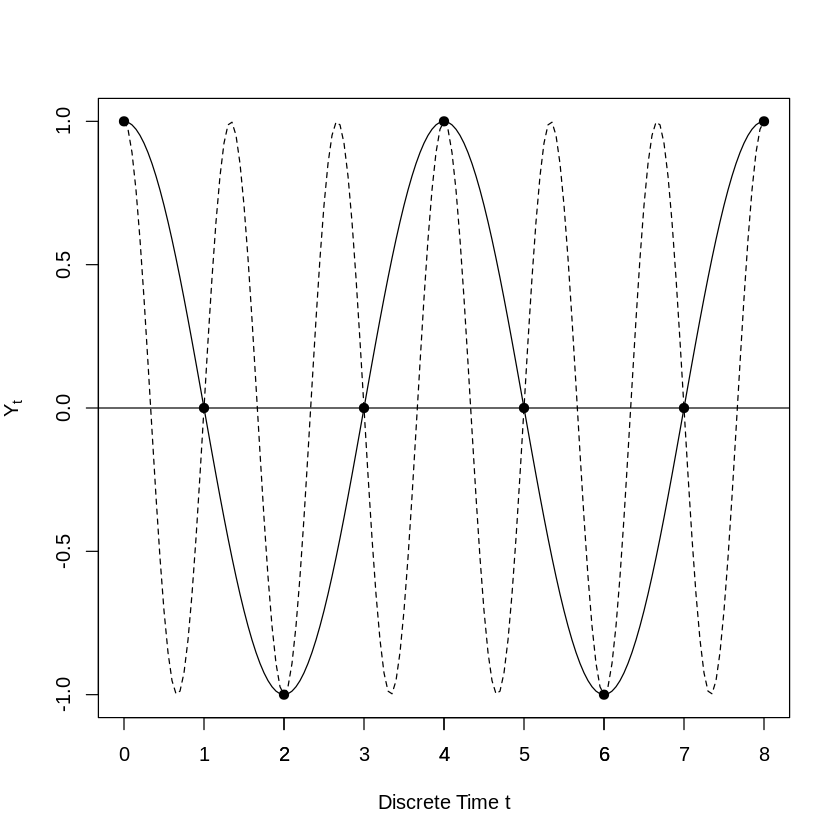

In [ ]:
## Phenomenon of Aliasing (TSAAR)
t <- seq(0,8,by=.05)
plot(t,cos(2*pi*t/4),axes=F,type='l',ylab=expression(Y[t]), xlab='Discrete Time t')
axis(1,at=c(1,2,3,4,5,6,7));axis(1); axis(2); box()
lines(t,cos(2*pi*t*3/4),lty='dashed',type='l'); abline(h=0)
points(x=c(0:8),y=cos(2*pi*c(0:8)/4),pch=19)

## Spectral Representation and Spectral Distribution (TSAAR)

Suppose we have a time series based on the harmonic regression model:

$$Y_t = \sum_{j=1}^m \left[ A_j \cos(2\pi f_j t) + B_j \sin(2\pi f_j t) \right]$$

Except that $A_j, B_j \sim ind. N(0, \sigma_j^2)$. This is described as a *purely discrete spectrum* process, also called a *line spectrum process*.

Then, $E(Y_t) = 0$ and the autocovariance $\gamma_k = Cov(Y_t, Y_{t-k})$ is

$$ \gamma_k = \sum_{j=1}^m \sigma_j^2 \cos(2\pi f_j k) $$

And that the variance of $Y_t$ is equal to the total variances from each frequency since $\cos (0) = 1$:

$$ Var (Y_t) = \gamma_0 = \sum_{j=1}^m \sigma_j^2 $$

Note that we can represent $Y_t$ in terms of stochastic integrals (don't worry, we won't talk about stochastic calculus) called the *spectral representation* such that

$$Y_t = \int_0^{1/2} \cos(2 \pi f t) da(f) + \int_0^{1/2} \sin(2 \pi f t) db(f)$$

Where $a(∘)$ and $b(∘)$ are sums of the random variables:

$$a(f) = \sum_{ \left\{ j | f_j \le f \right\} } A_j \quad , \quad b(f) = \sum_{ \left\{ j | f_j \le f \right\} } b_j $$

In fact, the integral representation can be derived from all zero-mean stationary processes. It implies that any stationary process can be expressed as an infinite sum of sine and cosine functions from different frequencies between 0 and 1/2.

The functions $a(f)$ and $b(f)$ are also zero-mean stationary processes indexed by $0 \le f \le 1/2$ with uncorrelated increments within each function and between the functions.

Another important feature is:

$$Var \left[  \int_{f_1}^{f_2}  da(f) \right] = Var \left[  \int_{f_1}^{f_2}  db(f) \right] = F(f_2) - F(f_1)$$

where $F(\circ)$ is defined as the spectral distribution function, which for a purely discrete spectrum has the formula:

$$ F(f) = \sum_{ \left\{ j | f_j \le f \right\} } \sigma^2_j $$

The properties of spectral distribution function $F(\circ)$ are:

1. F is monotone nondecreasing: for $f_1 < f_2$, $F(f_1) \le F(f_2)$.
2. F is right continuous: $lim_{x → f^+} F(x) = F(f)$.
3. $lim_{x → 1/2} F(x) = Var(Y_t) = \gamma_0$

Note that we can have a CDF if we consider the scaled function $F(f)/\gamma_0$.

The spectral distribution can be interpreted as follows: for $ 0\le f_1 < f_2 \le 1/2$,

$$\int_{f_1}^{f_2} dF(f) $$

describe the magnitude (not proportion) of $Var(Y_t) = F(1/2) = \gamma_0$ that is attributable for the frequencies $f_1$ to $f_2$

## Spectral Density (TSAAR)

### Sample Spectral Density

From hereon out, we assume $Y_t$ is a zero-mean stationary process without loss of generality, e.g., $Y_t = Y_t^* - \mu^*$ where $ Y_t^*$ is a stationary proces with mean $ \mu^* = E( Y_t^*)$.

Also for mathematical convenience, from hereon we will assume that all function with frequencies as inputs like the periodogram $I(f)$ is defined with domain $(-1/2, 1/2]$ of which the periodogram is symmetric at the vertical axis anyway, i.e., $I(|f|)=I(f)$.

The *sample spectral density* or *sample spectrum* is defined as:

$$\hat{S}(f) = \frac{1}{2} I(f) \quad, \quad f \in (-1/2, 1/2)$$
$$ \hat{S}(1/2) = I(1/2)$$

Alternatively, we can express the sample spectral density in terms of the autocovariance values of $Y_t$, a special case of the *Wiener-Khinchin theorem*.

$$\hat{S}(f) = \hat{\gamma}_0 + 2 \sum_{k=1}^{n-1} \hat{\gamma}_k \cos (2 \pi k f) $$

where
$$\hat{\gamma}_k = \frac{1}{n} \sum_{t= k+1}^{n} (Y_t -\bar{Y}) (Y_{t-k} -\bar{Y}) $$

In Fourier analysis, there is an inverse relationship between $S(f)$ and $\gamma_k$:

$$\hat{\gamma}_k  = \int_{-1/2}^{1/2} \hat{S}(f) \cos (2 \pi k f) df$$

In particular, at $k=0$ the sample spectral density has the sample variance as its total area:

$$\hat{\gamma}_0  = \int_{-1/2}^{1/2} \hat{S}(f) df =  \frac{1}{n} \sum_{t= 1}^{n} (Y_t -\bar{Y})^2 $$

Comment:
* This means that the spectral density and the autocovariance (and autocorrelation) functions have similar information.
* In some situations, the autocovariance function may be preferable, in other situations, the spectral density is preferred. However, both still give the same information.


### Theoretical (or Population) Spectral Density

We define the theoretical or population spectral density of a zero-mean stationary process for $-1/2 < f \le 1/2$ as

$$ S(f)= \gamma_0 + 2 \sum_{k=1}^{\infty} \gamma_k \cos (2 \pi k f) = \sum_{k=-\infty}^{\infty} \gamma_k e^{-2 \pi i k f} $$

where $i = \sqrt{-1}$ And the inverse to generate the population autocovariance function $\gamma_k$ is

$${\gamma}_k  = \int_{-1/2}^{1/2} {S}(f) \cos (2 \pi k f) df = \int_{-1/2}^{1/2} {S}(f)  e^{-2 \pi i k f}  df$$

Also note that the spectral density is related to the spectral distribution function:

$$ F(f) = \int_0^f S(f) df \quad , \quad 0 \le f \le 1/2$$

Thus, $ 2 \int_{f_1}^{f_2} S(f) df =$ portion (not proportion) of variance attributed to the sine-cosine pairs with associated frequencies from $f_1$ to $f_2$.

Note:
* For stationary processes, $\gamma_k = \gamma_{-k}$; there is symmetry in the autocovariance function.
* the far-right sums in the spectral density and autocovariance function are used in signal processing and harmonic analysis, especiall physics and engineering.






### Time-Invariant Linear Filter

A *time-invariant linear filter* is a sequnece of absolutely summable constants $\{c_j\}_{j=-\infty}^{+\infty} = \{..., c_{-2}, c_{-1}, c_0, c_1, c_2,... \}$ such that for a time series $X_t$ a new filtered time series $Y_t$ by the equation:

$$ Y_t = \sum_{j = -\infty}^{+\infty} c_j X_{t-j} \quad , \quad  \sum_{j = -\infty}^{+\infty} |c_j| < \infty $$

Comment:
* The summation $c_j$ and $X_t$ in the filter is often called the *discrete convolution*

* Examples of linear filters: centered $(2m+1)$-term moving average filter where $c_j = \frac{1}{2m+1}$ for $j= -m, -m+1,...,-1,0,1,..., m-1, m$ amd $c_j = 0$ otherwise

$$ Y_t^{[centered]} =  \sum_{j = -m}^{m} \frac{1}{2m+1} X_{t-j} $$

* If $c_j = 0$ for $j < 0$, then the filter is *causal*, meaning the filtering will involve present and past values and without use of future values of $X_t$

* Example of causal filter: AR(1) process with $c_j = \phi^j$ for $j \ge 0$

$$Y_t - \phi Y_{-1} = \epsilon_t  ⇒ Y_t = \frac{1}{1- \phi B} \epsilon_t ⇒ Y_t = \sum_{j=0}^{\infty} \phi^j \epsilon_{t-j} $$

* In fact, stationary $SARMA(p,q)\times(P,Q)_m$ processes are causal filters; for $Y_t \sim SARMA(p,q)\times(P,Q)_m$:

$$ Y_t = \sum_{j=0}^{\infty} \psi_j \epsilon_{t-j} $$
$$\psi_j: \psi(B) = \sum_{j=0}^{+\infty} \psi_j B^j = \frac{\left( 1 + \sum_{j=1}^{q} \theta_j B^j \right) \left( 1 + \sum_{j=1}^{Q} \Theta_j B^{mj} \right) }{ \left( 1 - \sum_{j=1}^{p} \phi_j B^j \right) \left( 1 - \sum_{j=1}^{P} \Phi_j B^{mj} \right) } \quad , \quad \sum_{j=0}^{\infty} |\psi_j| < \infty $$

* $\psi_j$ in the preceding equation is known as the *impulse response function* at $j$. $\psi_0 = 1$.




### Spectral Densities of ARMA Processes

Suppose we have a time-invariant linear filter with coefficients $\{ c_j \}_{-\infty}^{+\infty}$ and let $X_t$ be a stationary time series and $Y_t$ is the filtered time series of the form

$$ Y_t = \sum_{j = -\infty}^{+\infty} c_j X_{t-j}$$

In addition, let $C(z) = \sum_{j = -\infty}^{+\infty} c_j z^{ j }$, so

$$C\left(e^{-2 \pi i f } \right) = \sum_{j = -\infty}^{+\infty} c_j e^{-2 \pi i f j }$$

Then to solve the spectral density of $Y_t$ given the spectral density of $X_t$ with linear filter $\{ c_j \}_{-\infty}^{+\infty}$, the formula is (TSAAR)

$$S_Y (f) = \left| C\left(e^{-2 \pi i f } \right) \right|^2 S_X (f)$$

Comment:
* The function $ \left| C\left(e^{-2 \pi i f } \right) \right|^2$ is often called the *(power) transfer function* of the filter.




#### White Noise Process

Recall that

$$ S(f)= \gamma_0 + 2 \sum_{k=1}^{\infty} \gamma_k \cos (2 \pi k f) $$

But since white noise time series $\epsilon_t  \sim iid. N(0,\sigma_\epsilon^2)$ has $\gamma_k = 0$ for $k>0$ and $\gamma_0 = \sigma_\epsilon^2$, then

$$ S(f)= \sigma_\epsilon^2 $$

which means that every frequency contributes equally. In terms of light, every frequency of color shines equally, thus the color white. So THAT WHY IT'S WHITE NOISE LOL.

#### The Property of Spectral Densities of ARMA (TSAAR)

If $Y_t \sim SARMA(p,q)\times(P,Q)_m$ process with white noise $\epsilon_t  \sim iid. N(0,\sigma_\epsilon^2)$, then the spectral density is

$$S_Y (f) = \sigma_\epsilon^2  \left| \psi \left(e^{-2 \pi i f } \right) \right|^2$$
$$\psi \left(e^{-2 \pi i f } \right) = \sum_{j = 0}^{+\infty} \psi_j e^{-2 \pi i f j }$$




##### Spectral Density of MA(1)

Suppose we have an $Y_t \sim MA(1)$, given by

$$Y_t = \epsilon_t + \theta_1 \epsilon_{t-1}$$

Its associated $\psi(z)$ function is

$$\psi(z) = 1 + \psi_1 z= 1 +  \theta_1  z \quad , \quad \psi_1 = \theta_1$$

And thus the spectral density is derived as follows:

$$S_Y (f) = \sigma_\epsilon^2  \left| \psi \left(e^{-2 \pi i f } \right) \right|^2 = \sigma_\epsilon^2  \left| 1 +  \theta_1  e^{-2 \pi i f }   \right|^2 $$

By definition of absolute value of complex numbers

$$ S_Y (f) = \sigma_\epsilon^2 \left[\sqrt{ \left( 1 +  \theta_1  e^{-2 \pi i f } \right) \left( 1 +  \theta_1  e^{2 \pi i f } \right) } \right]^2$$

The square and square root cancel each other and we do the operations inside

$$ S_Y (f) = \sigma_\epsilon^2 \left[ 1 + \theta_1 \left( e^{2 \pi i f } + e^{-2 \pi i f } \right) + \theta_1^2  \right]$$

And the mathematical equality $\cos (x) =\frac{e^{ix} + e^{-ix}}{2}$, we finally get

$$ S_Y (f) = \sigma_\epsilon^2 \left[ 1 + 2 \theta_1 \cos (2 \pi f)  + \theta_1^2  \right]$$

Note:

* I will not be showing how the next ARMA examples are derived.

Now, let's show some of the example $MA(1)$ spectra at $\theta_1 = -0.9, -0.2, 0.2,$ and $ 0.9$. We assume in these plots that $\sigma_\epsilon^2  = 1$

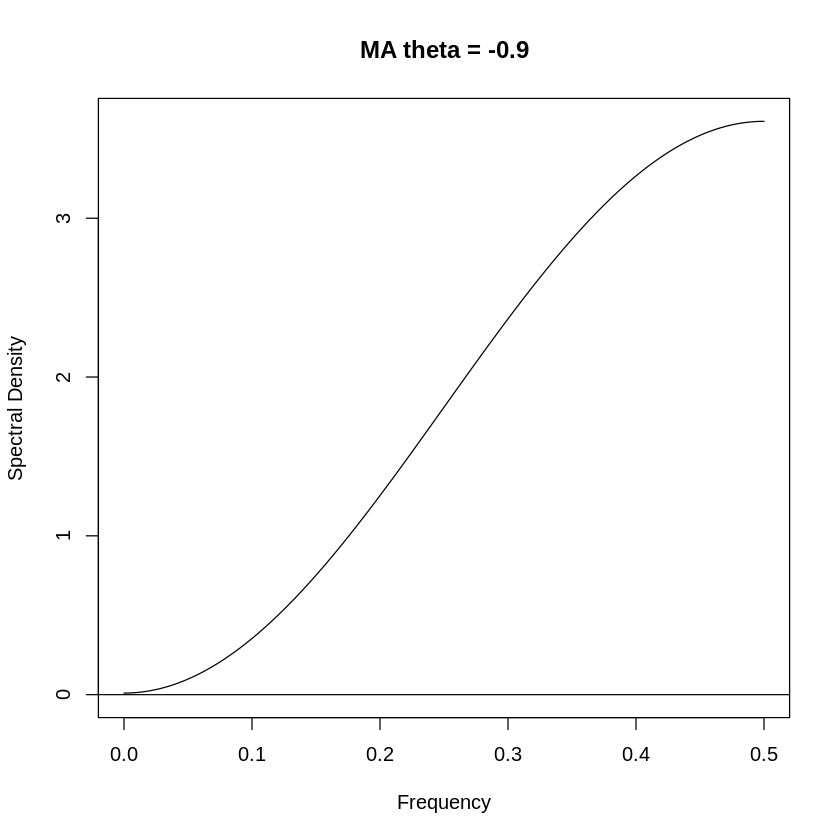

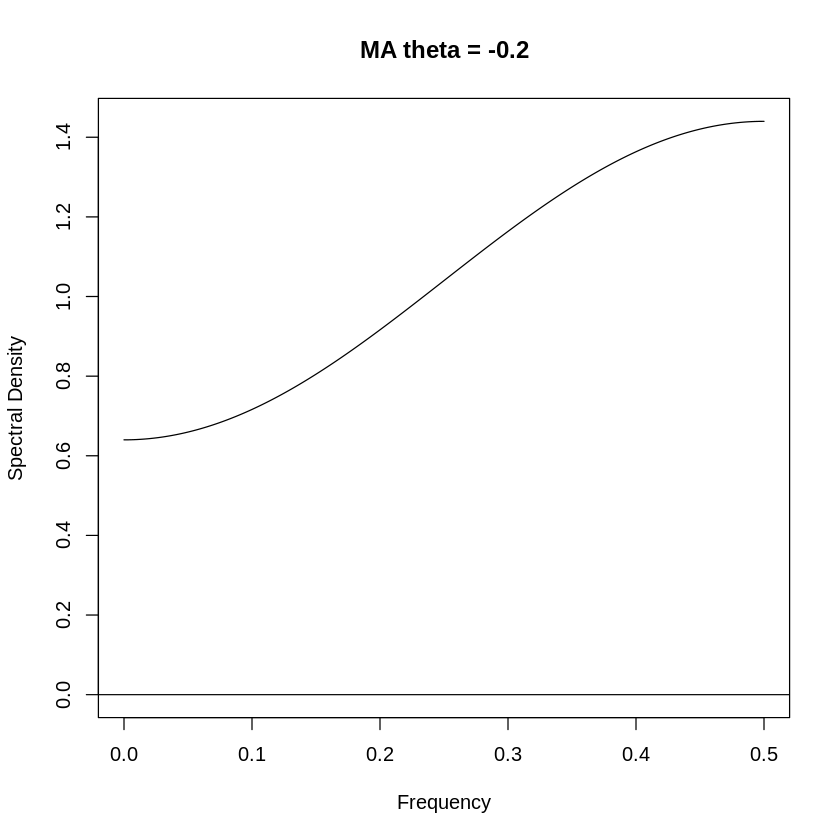

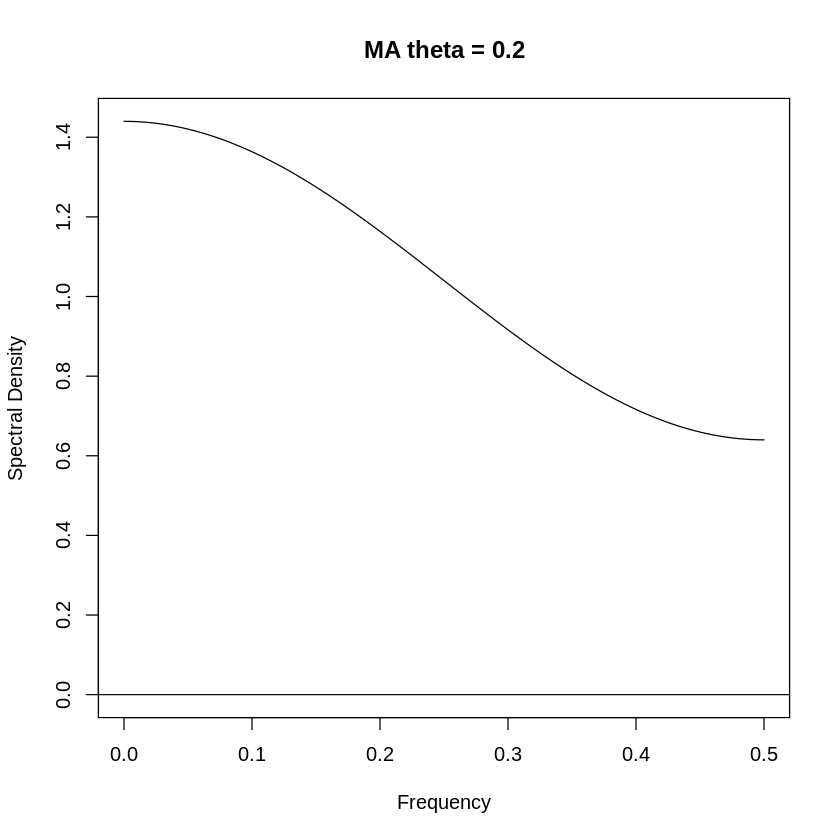

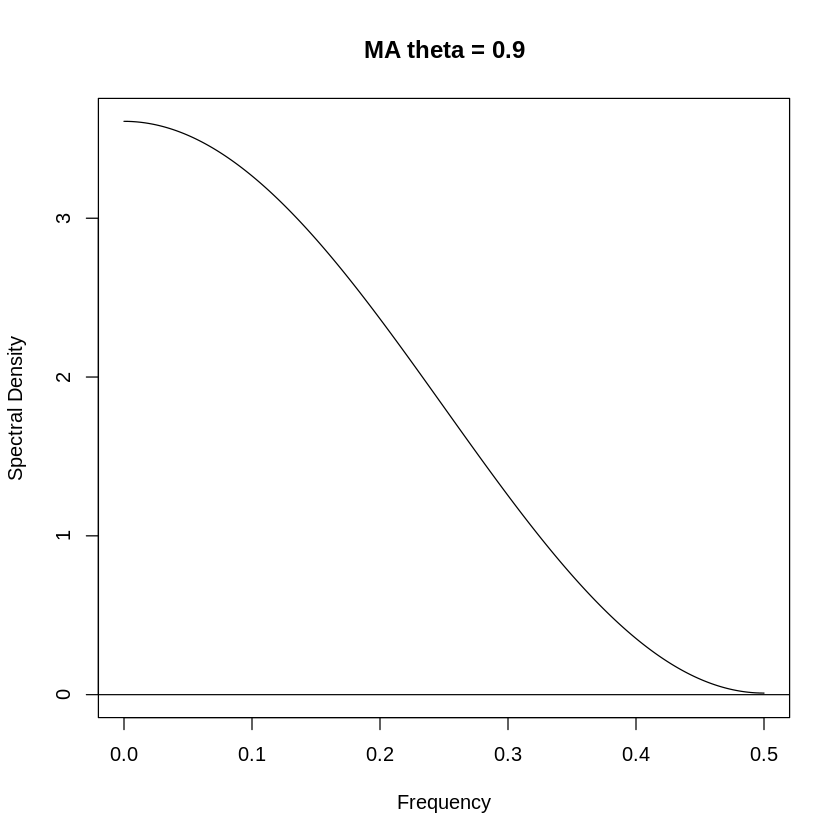

In [ ]:
## Sample of MA Spectra

## Sample thetas
theta <- c( -0.9, -0.2, 0.2, 0.9)

## Display all plots

for (i in 1:4) {
  ARMAspec(  ## function for displaying ARMA spectra
          model = list( # Model specification in the form of a list
                       ma = theta[i]  # MA Parameter
                      ),
          main = paste0("MA theta = ", theta[i]) ## Title of plot
  )
}

## Note: I think there is a problem in TSAAR's display, which I have corrected.

Note:

* As can be seen in the plots, negative MA parameters have higher density in the higher frequencies. This is because with negative MA terms, the time series tends to fluctuate from negative to positive and vice-versa very fast, and thus indicating stronger high frequency fluctuations.

* When the MA parameter is close to zero, which is closer to white noise, it seems flatter.

* When the MA parameter is positive, the low frequency spectral values are higher. This is because positive MA terms means higher persistence of shocks or errors from the past. Thus, change may be slow and thus low frequency bands are more pronounced.

##### Spectral Density of AR(1)

For AR(1), the solution is:

$$S_Y (f) = \frac{\sigma_\epsilon^2}{1 + \phi^2 -2\phi \cos(2 \pi f)}$$

Now, let's show some of the example $AR(1)$ spectra at $\phi = -0.9, -0.2, 0.2,$ and $ 0.9$. We assume in these plots that $\sigma_\epsilon^2  = 1$

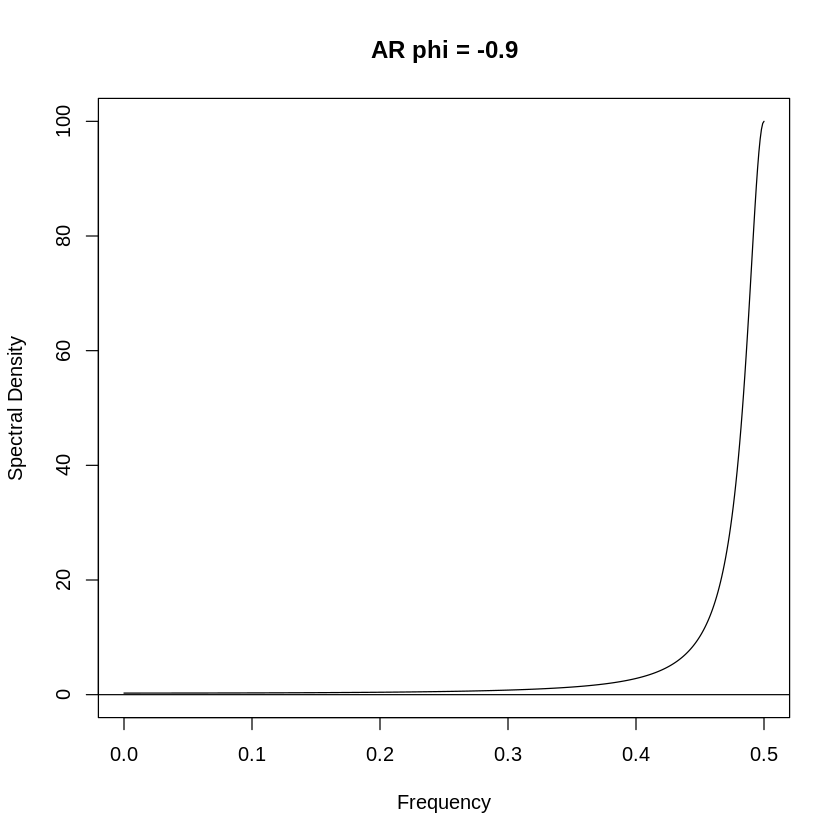

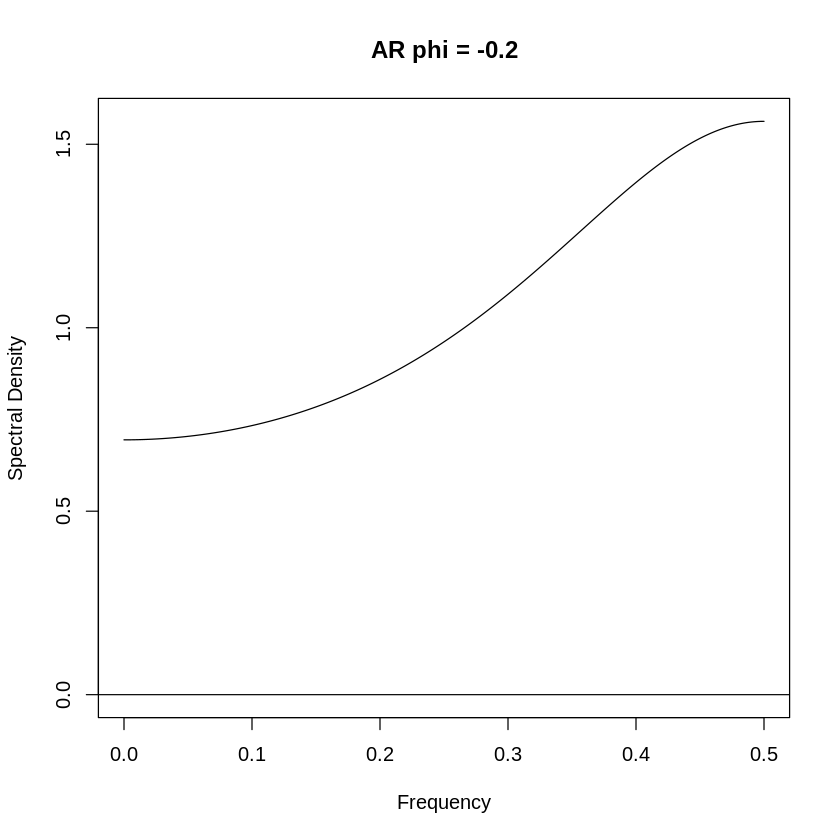

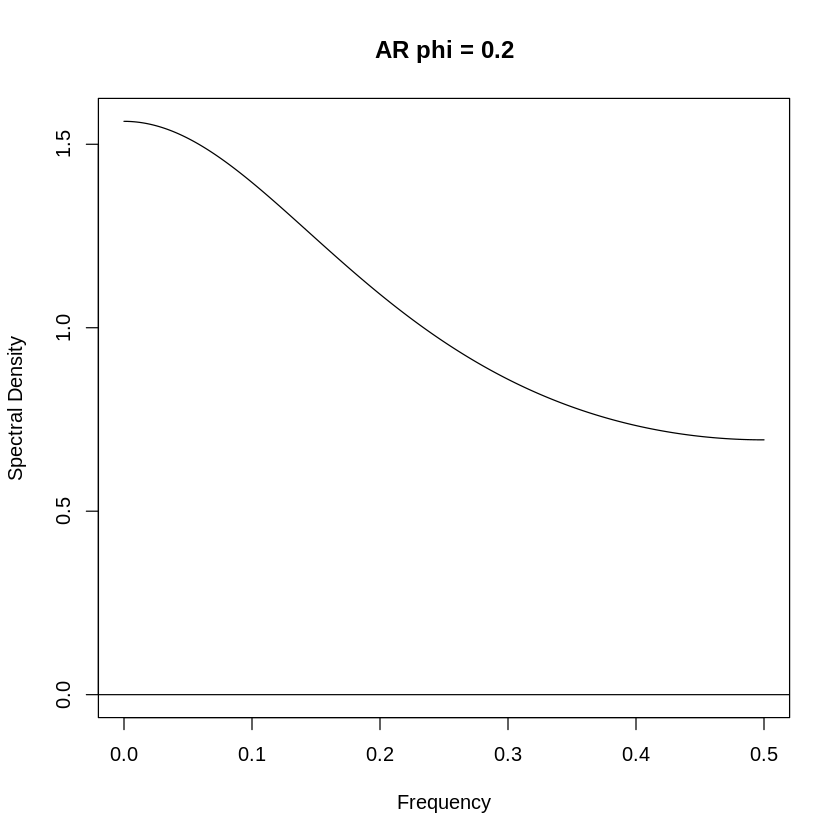

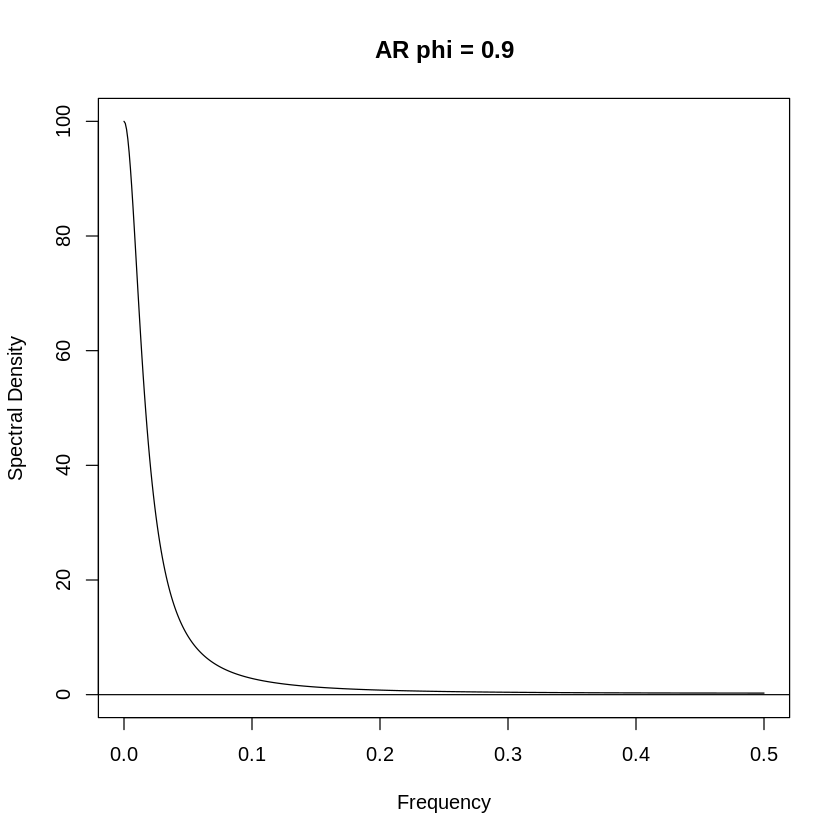

In [ ]:
## Sample of AR Spectra

## Sample phis
phi <- c( -0.9, -0.2, 0.2, 0.9)

## Display all plots

for (i in 1:4) {
  ARMAspec(  ## function for displaying ARMA spectra
          model = list( # Model specification in the form of a list
                       ar = phi[i]  # AR Parameter
                      ),
          main = paste0("AR phi = ", phi[i]) ## Title of plot
  )
}

## Note: I think there is a problem in TSAAR's display, which I have corrected.

##### Spectral Density of ARMA(1,1)

For ARMA(1,1), the solution is:

$$S_Y (f) = \frac{\sigma_\epsilon^2 \left[ 1 + 2 \theta_1 \cos (2 \pi f)  + \theta_1^2  \right] }{1 + \phi^2 -2\phi \cos(2 \pi f)}$$

Now, let's show some of the example $ARMA(1,1)$ spectra with combinations from $\phi = -0.9, -0.2, 0.2,$ and $ 0.9$ and $\theta = -0.9, -0.2, 0.2,$ and $ 0.9$. We assume in these plots that $\sigma_\epsilon^2  = 1$

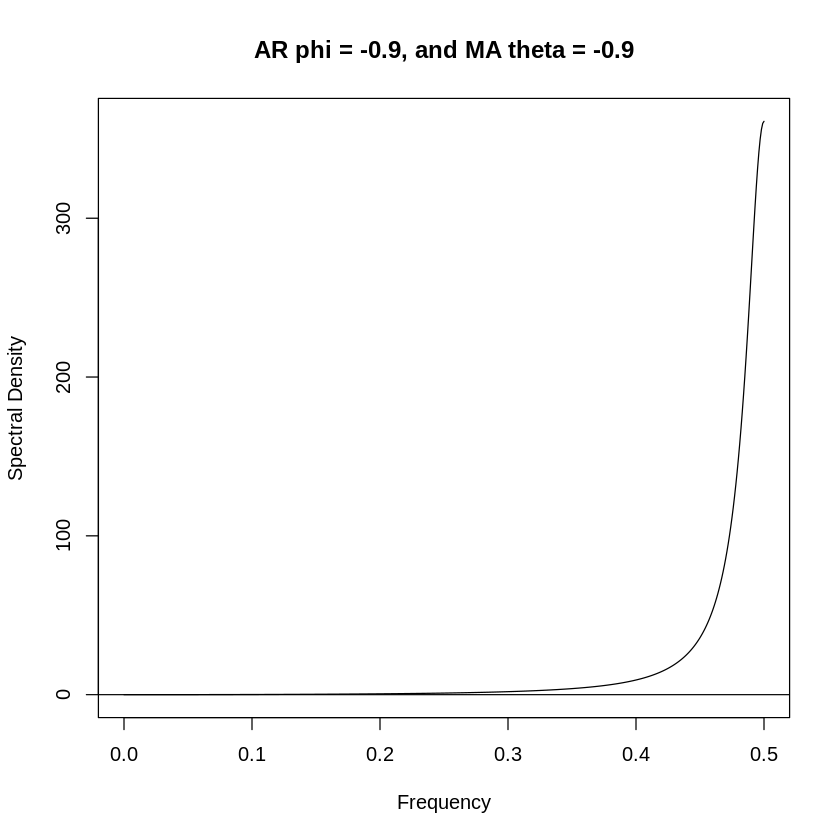

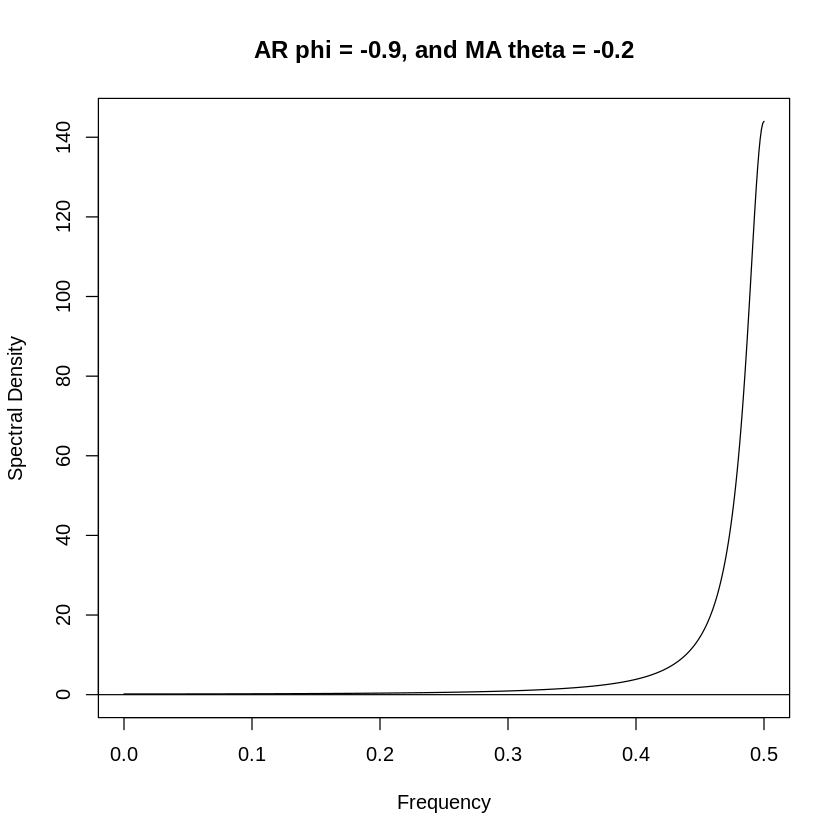

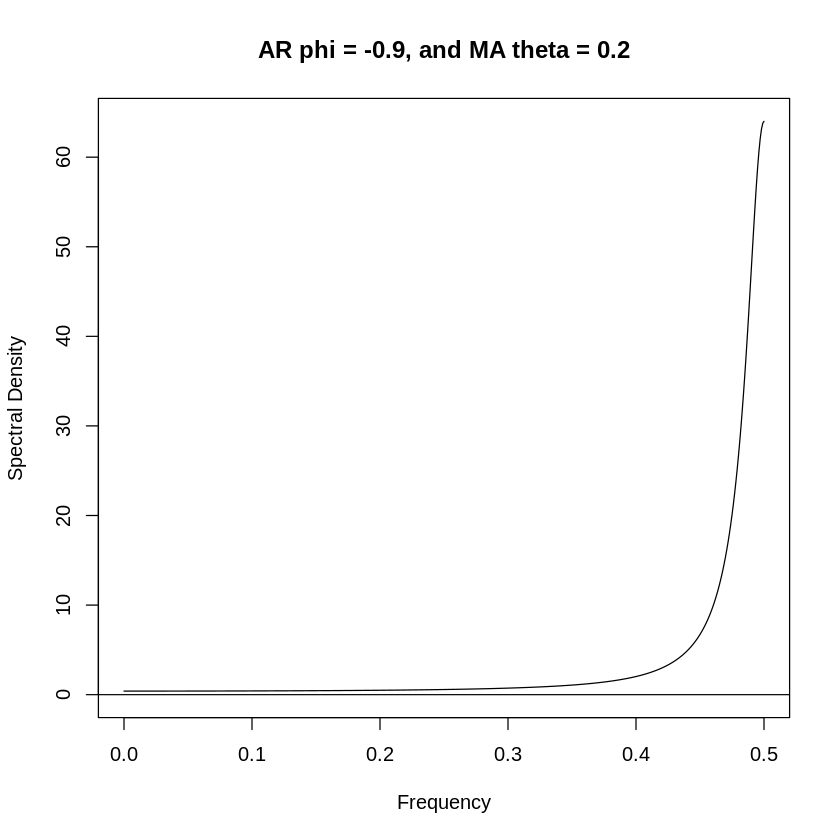

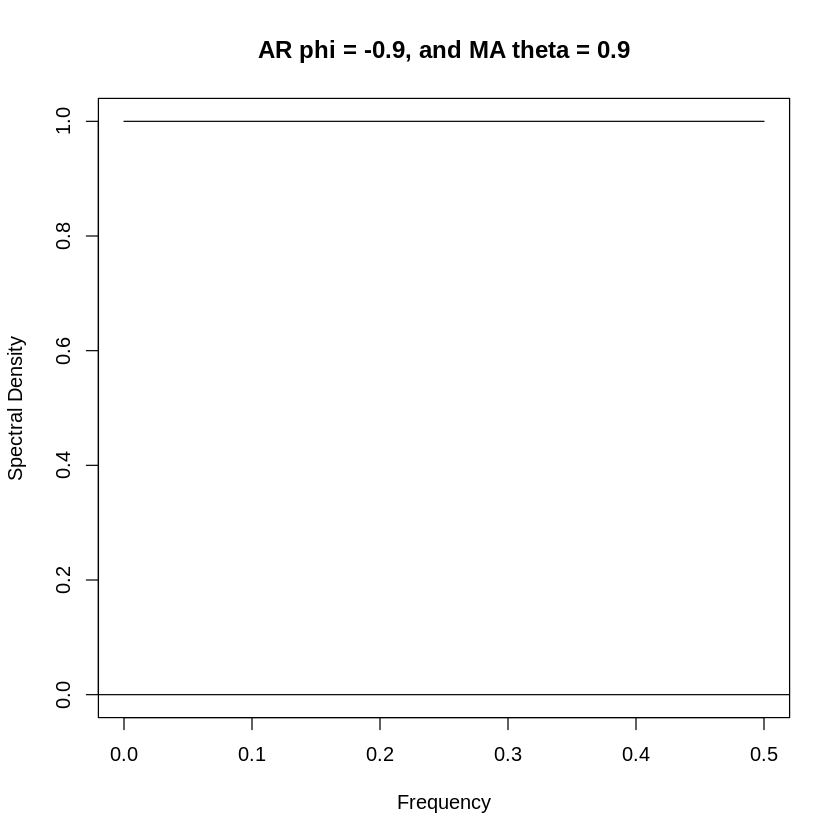

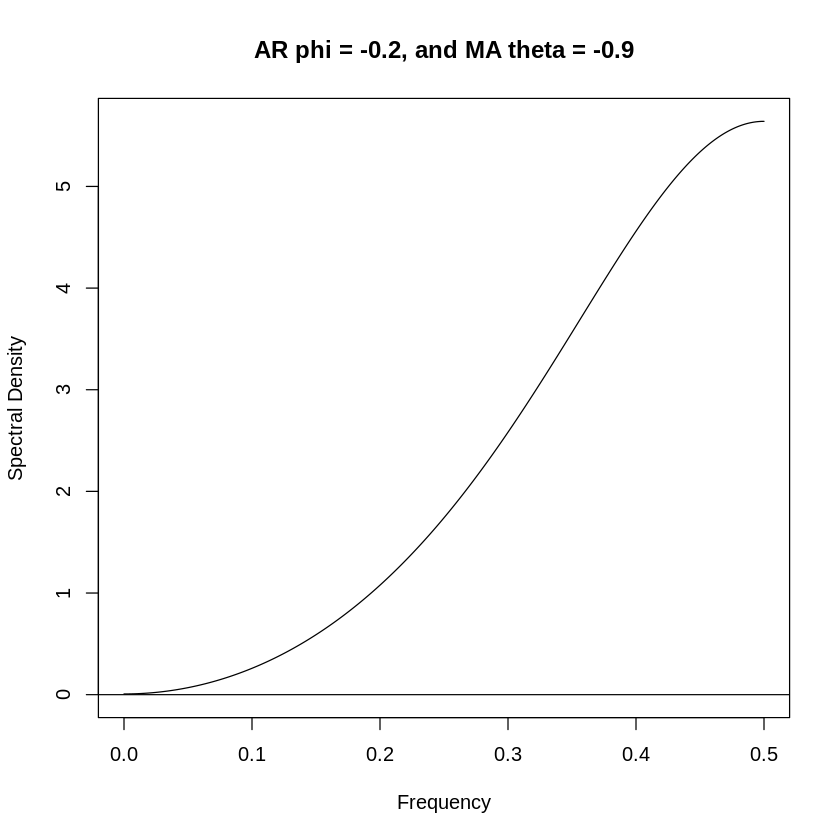

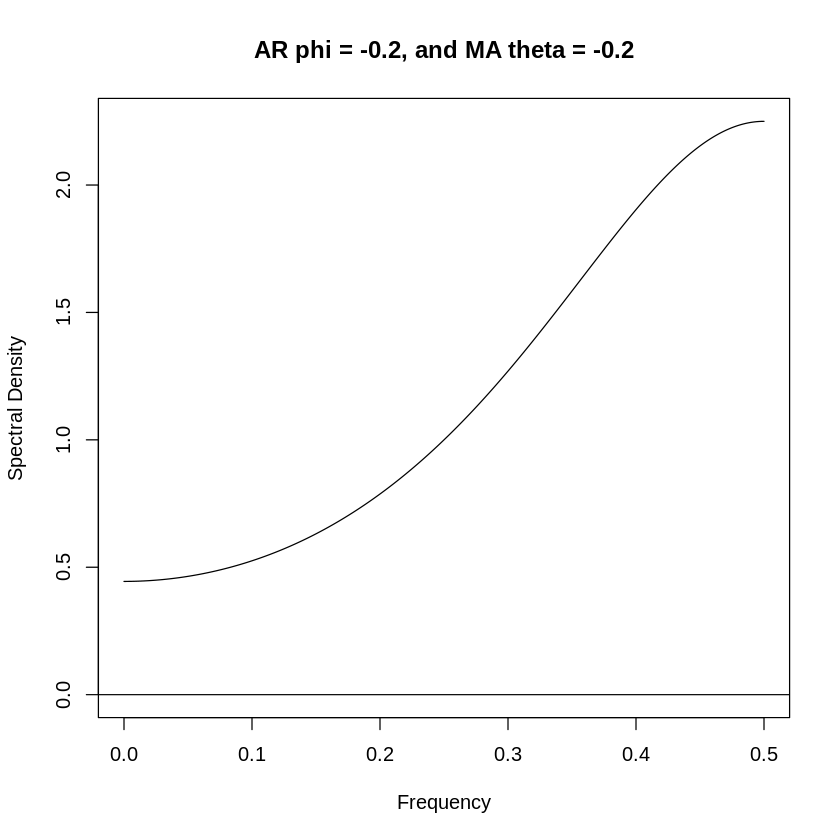

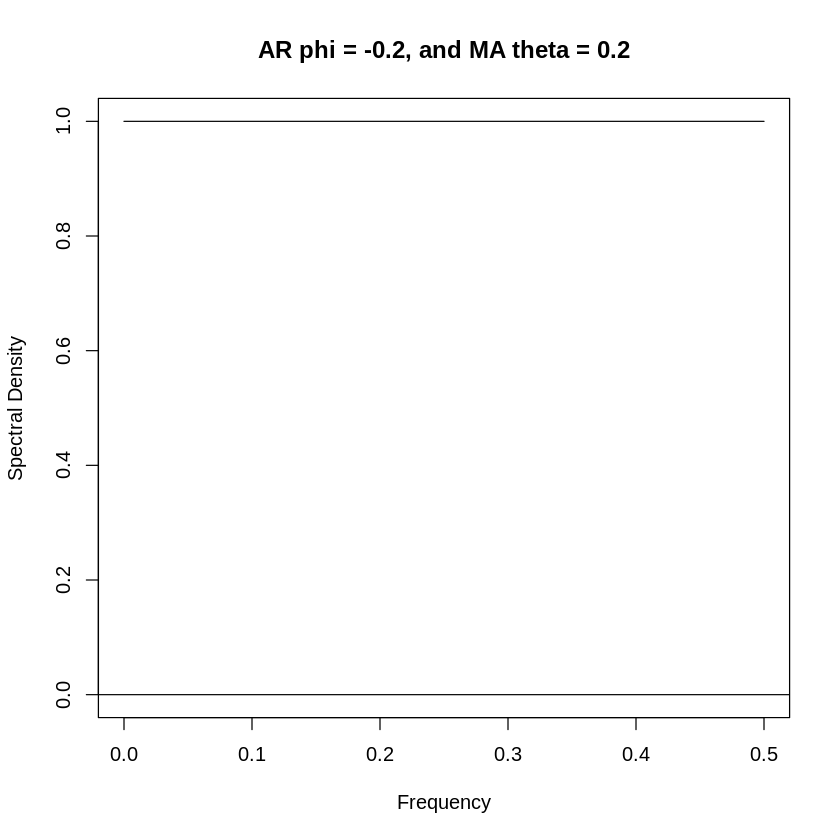

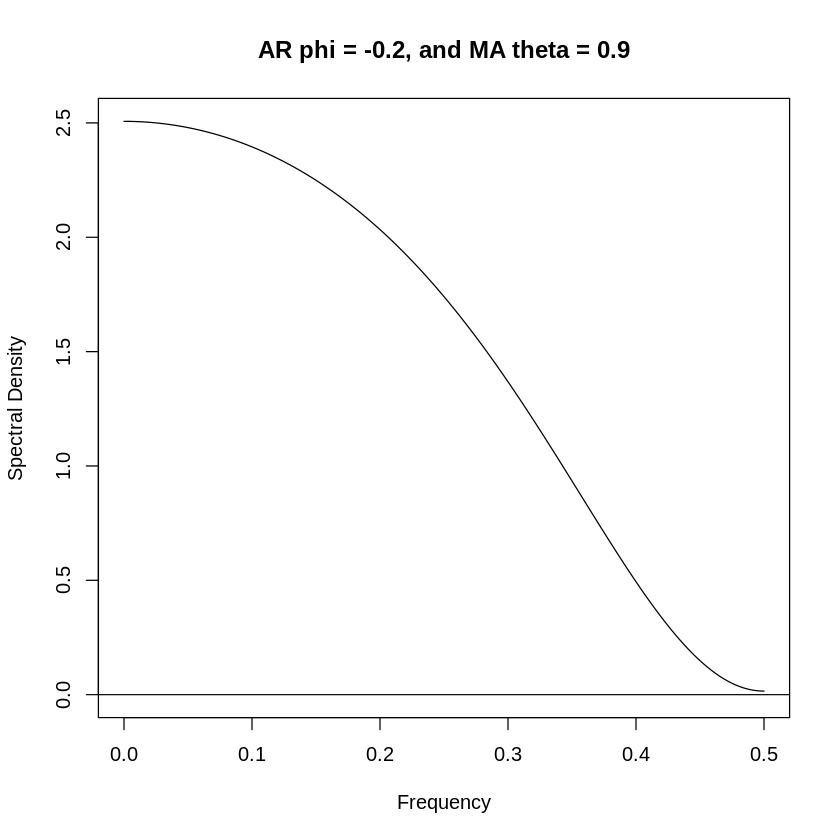

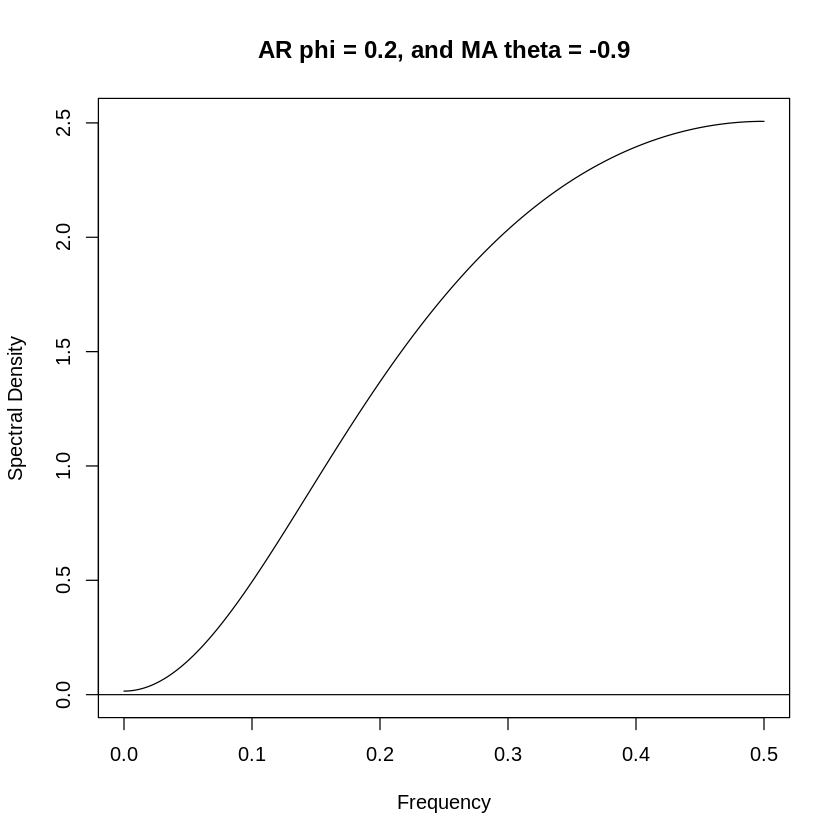

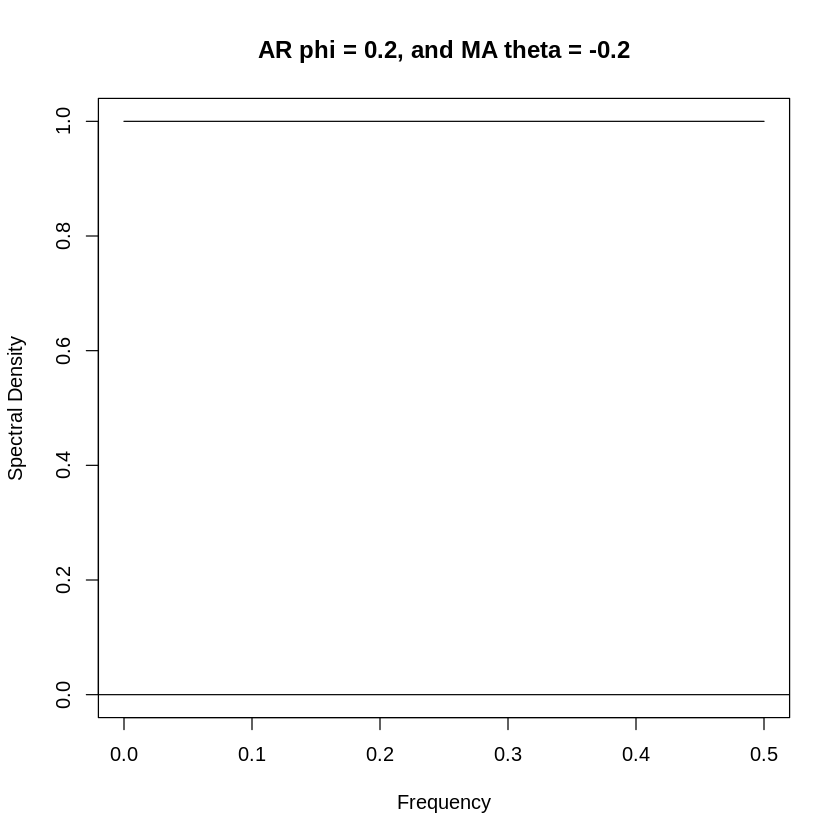

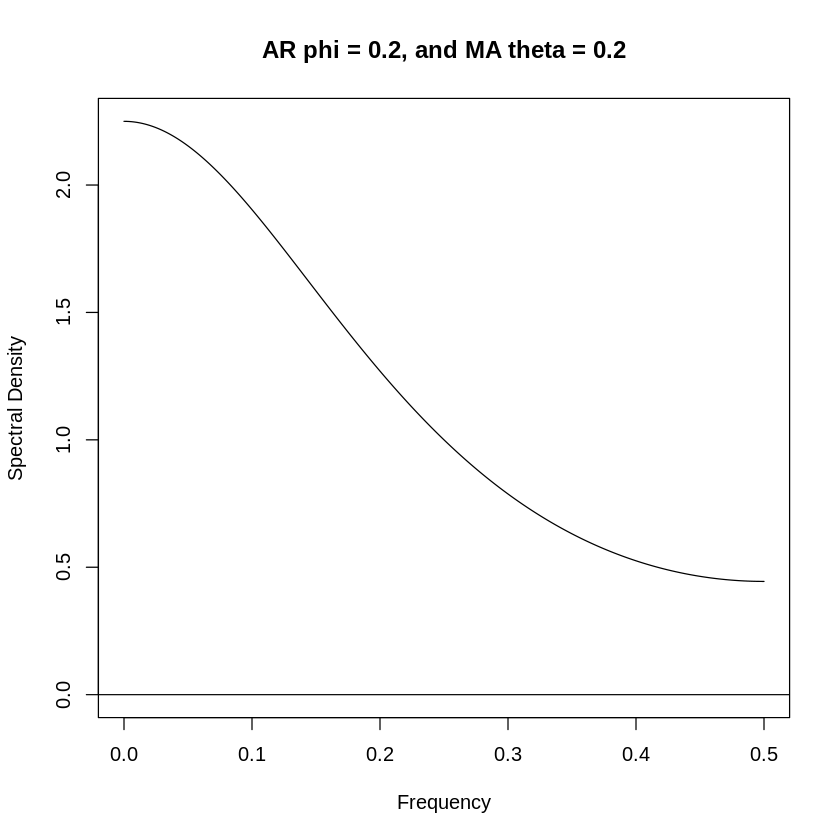

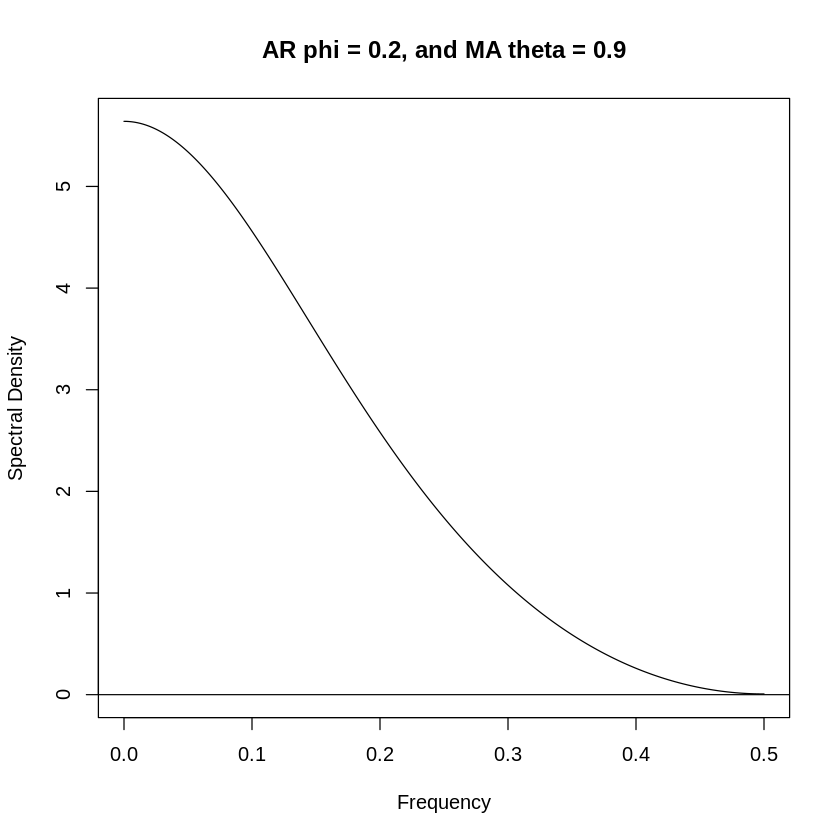

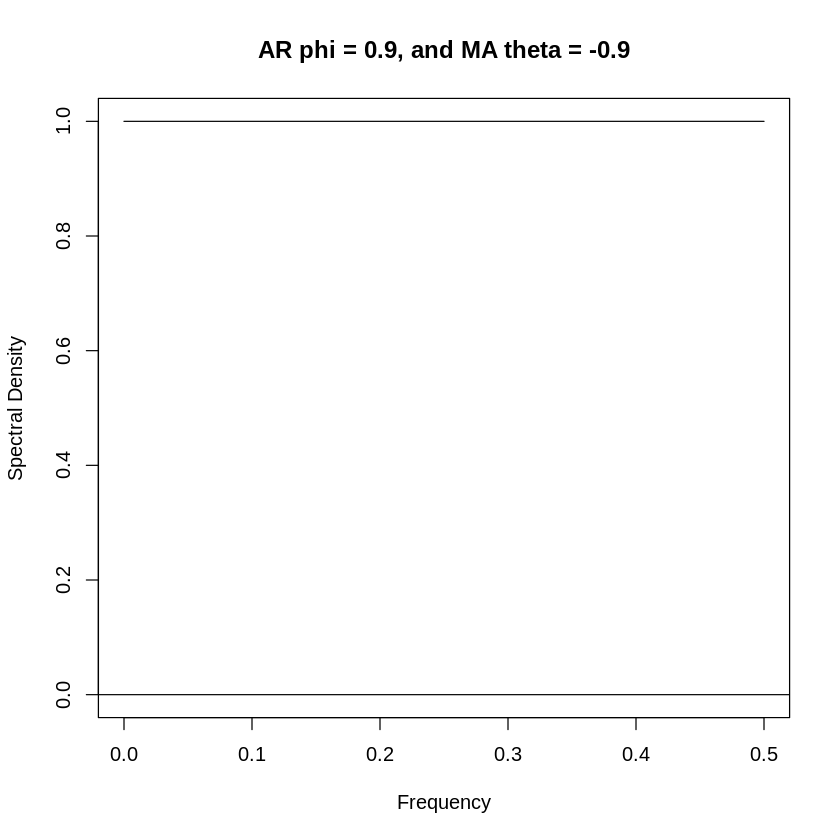

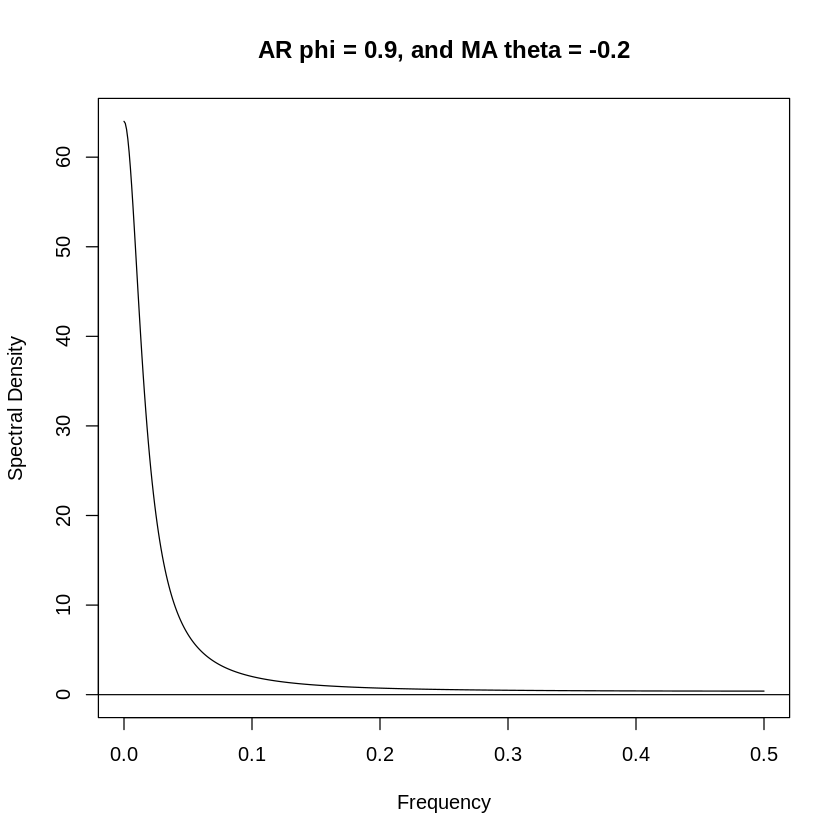

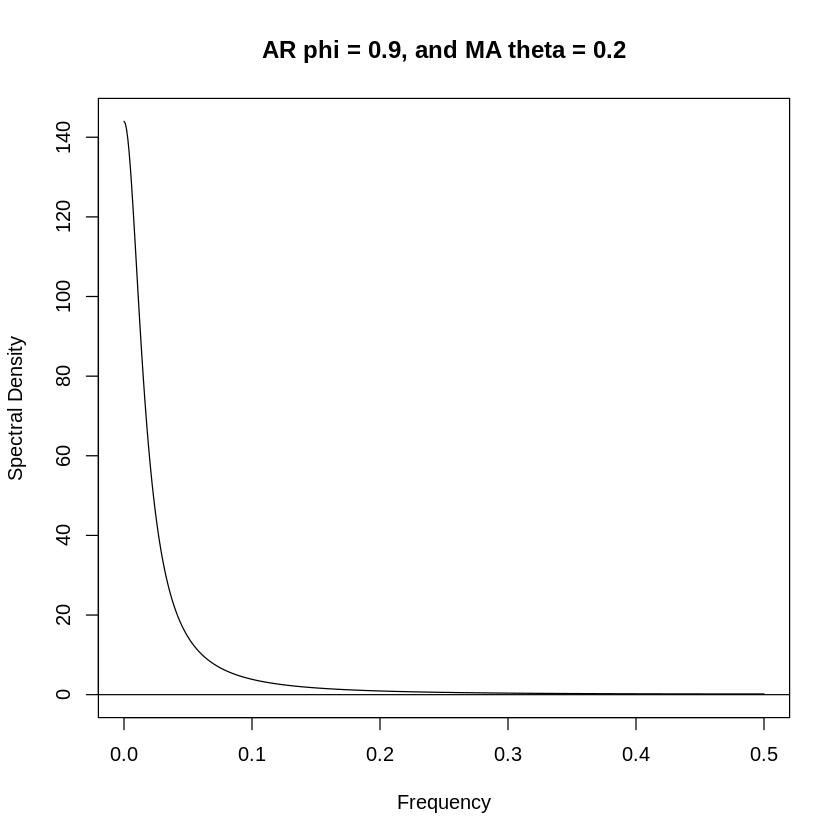

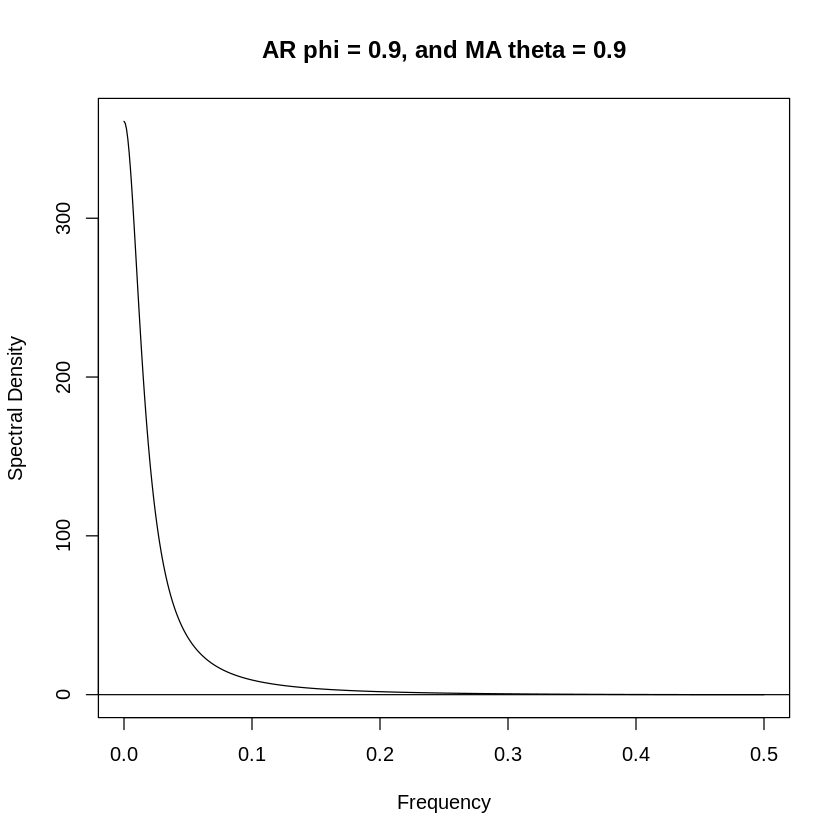

In [ ]:
## Sample of AR Spectra

## Sample phis
phi <- c( -0.9, -0.2, 0.2, 0.9)

## Sample thetas
theta <- c( -0.9, -0.2, 0.2, 0.9)

## Display all plots

for (i in 1:4) {
  for (j in 1:4) {
  ARMAspec(  ## function for displaying ARMA spectra
          model = list( # Model specification in the form of a list
                       ar = phi[i],  # AR Parameter
                       ma = theta[j]
                      ),
          main = paste0("AR phi = ", phi[i], ", and MA theta = ", theta[j]) ## Title of plot
  )
  }
}

## Note: I think there is a problem in TSAAR's display, which I have corrected.

##### Spectral of SARMA(1,0)x(1,0)m

The solution is

$$S_Y (f) = \frac{\sigma_\epsilon^2}{\left[ 1 + \phi^2 -2\phi \cos(2 \pi f) \right] \left[ 1 + \Phi^2 -2\Phi \cos(2 \pi m f) \right] }$$

We will show 1 example only: when $\phi = 0.5$, $\Phi = 0.9$, and $m = 12$

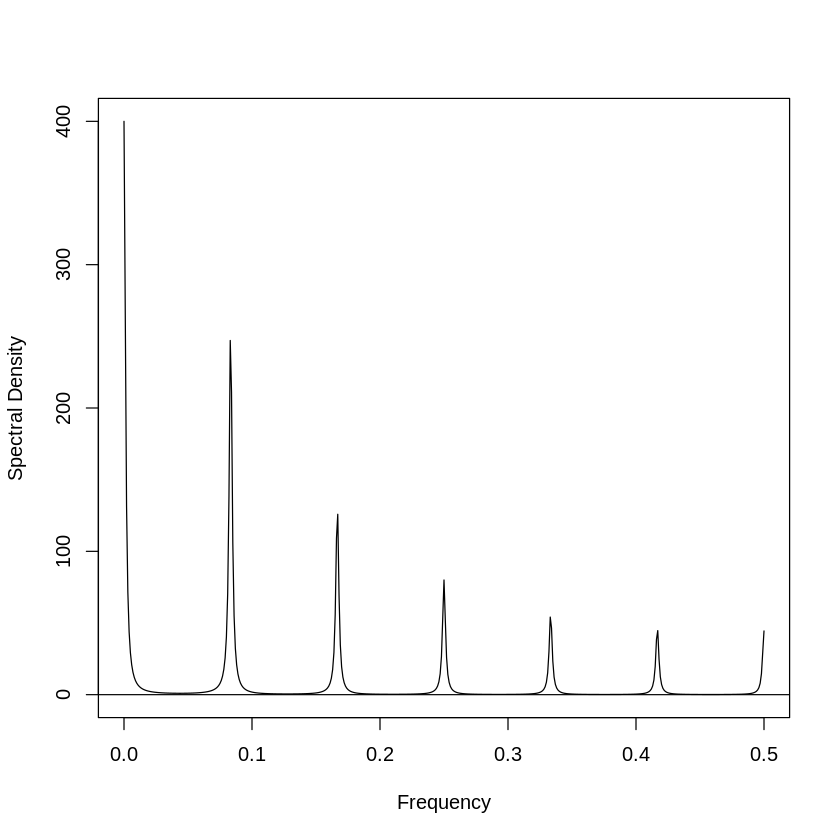

In [ ]:
phi=.5; PHI=.9
ARMAspec(model=list(ar=phi,seasonal=list(sar=PHI,period=12)))

The spikes are in the Fourier frequencies of the seasonality $m$: $f=0/m , 1/m,..., 1/2$.

##### Spectral of SARMA(0,1)x(0,1)m

The solution is

$$S_Y (f) =\sigma_\epsilon^2 \left[ 1 + 2 \theta \cos (2 \pi f)  + \theta^2  \right] \left[ 1 + 2 \Theta \cos (2 \pi m f)  + \Theta^2  \right]$$

We will show 1 example only: when $\theta = 0.4$, $\Theta = 0.9$, and $m = 12$

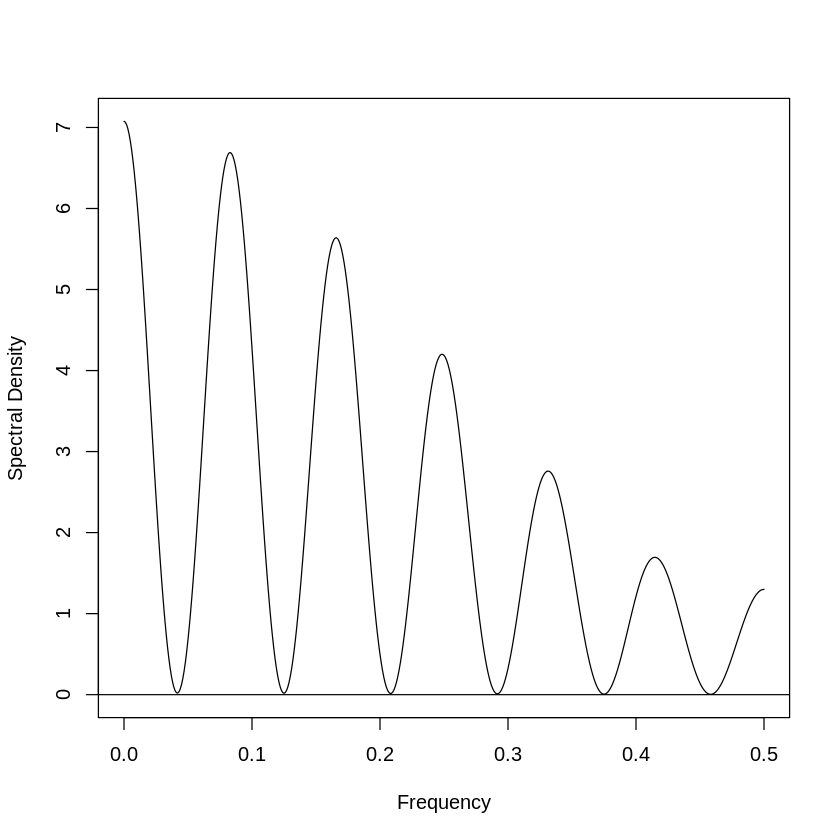

In [ ]:
theta=.4; Theta=.9
ARMAspec(model=list(ma=theta,seasonal=list(sma=Theta,
period=12)))

### Sample Properties of the Sample Spectral Density (TSAAR)

Let's show a sample simulation of an AR(1) process with its theoretical spectrum.

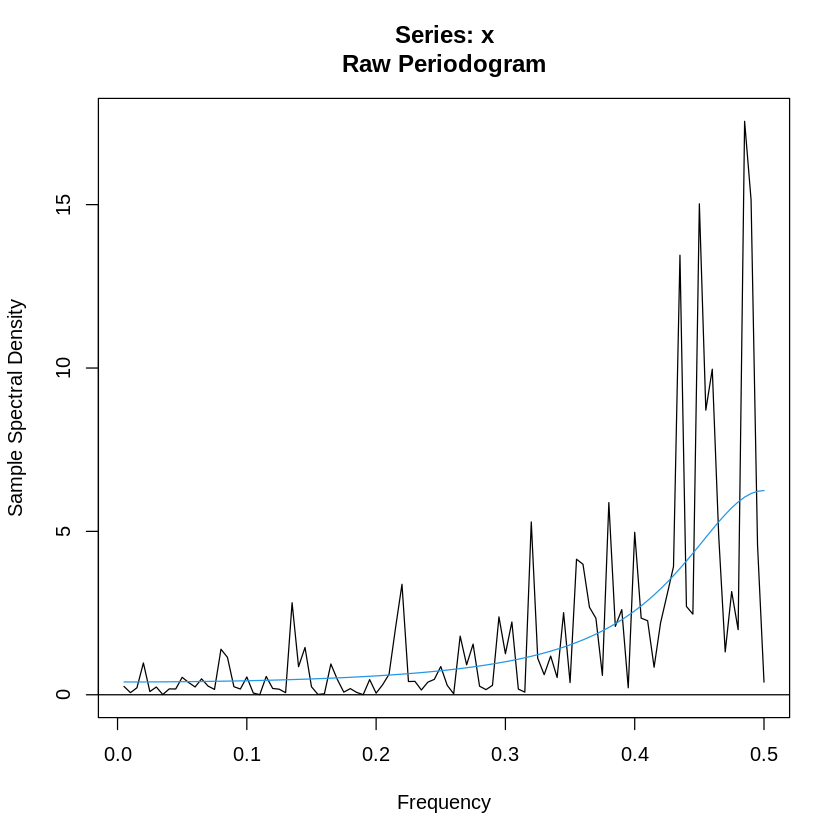

In [ ]:
set.seed(271435) #set seed for randomization
n=200 #sample size
phi=-0.6 #assumed phi
y <- arima.sim(model=list(ar=phi),n=n) #simulation
sp <- TSA::spec(y,log='no',xlab='Frequency', ylab='Sample Spectral Density',sub='') # Sample spectral density estimation
lines(sp$freq,ARMAspec(model=list(ar=phi),freq=sp$freq, plot=F)$spec,col = 4) # additional plot of theoretical
abline(h=0)

Though it seems centered around the theoretical spectral density, it seems volatile. We will give context with this matter.



Let's assume that $Y_t \sim iid. N(0,\gamma_0)$, without loss of generality. Recall that for the harmonic regression model with $Y_t$:

$$\hat{A}_f = \frac{2}{n} \sum_{t=1}^n Y_t \cos \left(2\pi f t \right) \quad  and \quad \hat{B}_f = \frac{2}{n} \sum_{t=1}^n Y_t \sin \left(2\pi f t \right) $$

Let's consider nonzero Fourier frequencies in which $f=j/n < 1/2$.

Here are the properties of $\hat{A}_f$ and $\hat{B}_f$:

* $\hat{A}_f \sim iid. N(0, 2 \gamma_0 /n )$ and $\hat{B}_f \sim iid.  N(0, 2 \gamma_0 /n ) $,
* $\hat{A}_f$ and $\hat{B}_f$ are independent of each other
* For $f_1 \ne f_2$, $\hat{A}_{f_1}$, $\hat{A}_{f_2}$, $\hat{B}_{f_1}$, and $\hat{B}_{f_2}$ and jointly independent.

Note that by these properties, and that $\S(f) =\gamma_0$ for white noise, that

$$\frac{n}{2 \gamma_0} \left[ \hat{A}_f^2 + \hat{B}_f^2 \right]= \frac{2 \hat{S}(f) }{{S}(f) } \sim \chi_{(df = 2)}^2$$

From here, we can infer the following:

* For $f_1 \ne f_2$, $ \hat{S}(f_1)$ and $ \hat{S}(f_2)$ are independent

* $E[\hat{S}(f)] = {S}(f)$, which means it is unbiased

* $Var[\hat{S}(f)] = {S}^2(f)$, this is problematic as the variance is not a function of $1/n$ and thus does not improve with increase in sample size; it is ***inconsistent***.

Thus, what we saw from the example simulation, even with large sample size, our estimation of the population spectrum is inconsistent.

We need a better way, which we will talk about in the next section.

# References:

(TATSAIR): Chatfield C & Xing H (2019).  The analysis of time series: an introduction with R, Seventh Ed. CRC Press.

(TSAAR): Cryer JD & Chan K-S (2008). Time Series Analysis With Applications in R, Second Edition. Springer Science+Business Media, LLC.

(TSDAAUR): Shumway RH & Stoffer DS (2019). Time series: a data analysis approach using R. CRC Press.